<a href="https://colab.research.google.com/github/sidhee-hande/InfoNetworksProject/blob/main/CS_6850_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **India News Headline Dataset (ToI)**

In [48]:
import pandas as pd
! pip install openpyxl

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 5.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
df = pd.read_csv('india-news-headlines.csv')

In [3]:
df

publish_date              headline_category   
0            20010102                        unknown  \
1            20010102                        unknown   
2            20010102                        unknown   
3            20010102                        unknown   
4            20010102                        unknown   
...               ...                            ...   
3650965      20220331                  city.srinagar   
3650966      20220331  entertainment.hindi.bollywood   
3650967      20220331                    city.trichy   
3650968      20220331                     city.erode   
3650969      20220331                     city.salem   

                                             headline_text  
0        Status quo will not be disturbed at Ayodhya; s...  
1                      Fissures in Hurriyat over Pak visit  
2                    America's unwanted heading for India?  
3                       For bigwigs; it is destination Goa  
4                     Extra buses to clear tourist traffic  
...                                                    ...  
3650965  J&K sacks 2 cops; 3 other employees over terro...  
3650966  Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...  
3650967  As Covid-19 cases drop to nil in southern dist...  
3650968  Tamil Nadu sees marginal rise of Covid cases w...  
3650969  Tamil Nadu sees marginal rise of Covid cases w...  

[3650970 rows x 3 columns]

In [6]:
categories = list(df['headline_category'].unique())

In [7]:
categories
df_time = df[(df["publish_date"]>20130000) ]
df_time

publish_date                      headline_category   
1531086      20130101                life-style.food.recipes  \
1531087      20130101     life-style.relationships.man-woman   
1531088      20130101  life-style.health-fitness.health-news   
1531089      20130101                                unknown   
1531090      20130101     life-style.relationships.man-woman   
...               ...                                    ...   
3650965      20220331                          city.srinagar   
3650966      20220331          entertainment.hindi.bollywood   
3650967      20220331                            city.trichy   
3650968      20220331                             city.erode   
3650969      20220331                             city.salem   

                                             headline_text  
1531086             Appetizer recipe: Corn & Basil Fingers  
1531087            Men taking to cooking like never before  
1531088                         Theatre can be therapeutic  
1531089                      Should you buy a resale flat?  
1531090                               How to not get raped  
...                                                    ...  
3650965  J&K sacks 2 cops; 3 other employees over terro...  
3650966  Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...  
3650967  As Covid-19 cases drop to nil in southern dist...  
3650968  Tamil Nadu sees marginal rise of Covid cases w...  
3650969  Tamil Nadu sees marginal rise of Covid cases w...  

[2119884 rows x 3 columns]

In [ ]:
df_time_period = df_time[(df_time["publish_date"]>20130000)]
df_time_period

In [ ]:
categories = list(df_time_period['headline_category'].unique())

In [ ]:
categories
f = open("cat.txt", 'w')
f.write("\n".join(categories))

0

In [ ]:
filtered_categories =  list()

f = open("/content/fitlered_cats.txt", 'r')

filtered_categories = f.read().split("\n")
len(filtered_categories)

In [ ]:
categorycounts = df_time_period["headline_category"].value_counts()

In [ ]:
print(len(df_time_period[df_time_period["headline_text"].str.contains("Congress")]))
print(len(df_time_period[df_time_period["headline_text"].str.contains("Rahul Gandhi")]))
print(len(df_time_period[df_time_period["headline_text"].str.contains("BJP")]))
print(len(df_time_period[df_time_period["headline_text"].str.contains("Modi")]))

print(df_time_period.iloc[9000])

0
0
0
0


IndexError: ignored

In [ ]:
import spacy
import en_core_web_sm
from collections import Counter

In [ ]:
nlp = en_core_web_sm.load()

In [ ]:
article = nlp("My name is Alex")

In [ ]:
for x in article.ents:
  print(x.text, x.label_)

Alex PERSON


In [ ]:
print(len(''.join(str(df_time_period.headline_text.tolist()))))

textblob = ''.join(str(df_time_period.headline_text.tolist()))

tokens = nlp(textblob[:1000000])

25542638


In [ ]:
for x in tokens.ents:
  print(x.text, x.label_)

In [ ]:
nodes = [x.text for x in tokens.ents if x.label_ == "ORG" or x.label_ == "PERSON"]
Counter(nodes).most_common(70)

orgs = [x.text for x in tokens.ents if x.label_ == "ORG"]
people = [x.text for x in tokens.ents if  x.label_ == "PERSON"]


Counter(people).most_common(50)

[('Nirbhaya', 58),
 ('Haryana', 49),
 ('Gurgaon', 38),
 ('Vishwaroopam', 33),
 ('Ranji Trophy', 32),
 ('Kumbh', 31),
 ('Bangalore', 28),
 ('Goa', 26),
 ('Karnataka', 24),
 ('Kolkata', 24),
 ('Tamil Nadu', 24),
 ('Kerala', 21),
 ('Tripura', 21),
 ('Vivekananda', 20),
 ('Akbaruddin Owaisi', 20),
 ('Rahul Gandhi', 19),
 ('Cong', 18),
 ('Narendra Modi', 18),
 ('Teen', 17),
 ('Bhubaneswar', 17),
 ('Sonia', 17),
 ('Vijay', 17),
 ('Noida', 17),
 ('Odisha', 17),
 ('Jaipur', 17),
 ('Ranji', 15),
 ('Juvenile', 15),
 ('Schools', 15),
 ('VC', 14),
 ('Kamal', 13),
 ('Bollywood', 13),
 ('Verma', 13),
 ("Kumbh Mela'", 12),
 ('Salman Khan', 12),
 ('Gadkari', 12),
 ('Jayalalithaa', 11),
 ('Gang', 11),
 ('Twitter', 11),
 ('Stalin', 11),
 ('Nagpur', 11),
 ('Obama', 11),
 ('MS Dhoni', 11),
 ('Panaji', 10),
 ('Honey Singh', 10),
 ('Victim', 10),
 ('Guwahati', 10),
 ('Meghalaya', 10),
 ("Honey Singh'", 10),
 ('Gandhi', 10),
 ('Ludhiana', 10)]

## **Indian News Dataset**

In [4]:
import pandas as pd

Load dataset

In [5]:
ind_dataset = pd.read_csv("IND/IND.csv")

In [6]:
ind_dataset

News Title            Author   
0    Apple Will Stop Selling Older iPhones, And 6S ...      Gwyn D'Mello  \
1    WhatsApp Co-Founder Wants You To Delete Your F...      Gwyn D'Mello   
2    "Would Love To Be [In India] This Year" Elon M...     Sarthak Dogra   
3    This Year's iPhone XI Will Have Triple Camera ...      Gwyn D'Mello   
4    Despite The Game Ban, These Kids Won Rs 30 Lak...      Gwyn D'Mello   
..                                                 ...               ...   
995        Indulge in must have dishes this Durga Puja              IANS   
996  Ganesh Chaturthi recipe: Here's how you can ma...  Zee Media Bureau   
997            Fashion picks from 'Romeo Akbar Walter'              IANS   
998  Sheetala Saptami 2019: Date, Time and Signific...  Zee Media Bureau   
999     The art of celebrating birthdays traditionally  Zee Media Bureau   

                                         News Abstract        Day Genre   
0    Apple has since clarified they're not raising ...     friday  tech  \
1    Back in March last year, WhatsApp co-founder B...     friday  tech   
2    Tesla CEO Elon Musk had all eyes on himself in...     monday  tech   
3    Earlier this year OnLeaks, aka Steve Hemmersto...     monday  tech   
4    Most young Indians are no stranger to PUBG Mob...     sunday  tech   
..                                                 ...        ...   ...   
995  New Delhi: Sayari Das, Expert at Momspresso, Y...    tuesday  life   
996  New Delhi: The auspicious occasion of Ganesh C...   thursday  life   
997  New Delhi: Love the 1970s fashion? Costume des...     friday  life   
998  New Delhi: The auspicious occasion of Sheetala...  wednesday  life   
999  New Delhi: Birthdays remain the most awaited a...    tuesday  life   

     News Portal  
0    india_times  
1    india_times  
2    india_times  
3    india_times  
4    india_times  
..           ...  
995     zee_news  
996     zee_news  
997     zee_news  
998     zee_news  
999     zee_news  

[1000 rows x 6 columns]

Filter political news categories

In [7]:
political_news = ind_dataset[ ind_dataset['Genre'] == "poli"]
political_news

News Title            Author   
9    PM Narendra Modis Biopic To Release On April 1...     Garima Satija  \
10   This Farmer, With Only An Acre Of Land, Is Set...  Sylvester Tamang   
11   Man Prints 'No Gifts, Please Vote For PM Modi'...  Priyanshi Mathur   
12   How The Lok Sabha Elections 2019 Are Also The ...     Shweta Sengar   
13   PM Modi Tweets To 'Influencers', Urges Them To...    Maninder Dabas   
..                                                 ...               ...   
963  Suspended AAP lawmaker Haridner Singh Khalsa j...               PTI   
964  BJP Minister Anil Sharma not to campaign again...               PTI   
965  240 bills passed in outgoing Lok Sabha, Mahara...  Zee Media Bureau   
966  Tamil Nadu: IT department raids DMK leader Dur...  Zee Media Bureau   
967  Congress-RJD tensions subside; Bihar Mahagathb...  Zee Media Bureau   

                                         News Abstract        Day Genre   
9    Election season is around the corner and almos...     friday  poli  \
10   India's general elections are around the corne...    tuesday  poli   
11   Recently, there have been a lot of cases where...     monday  poli   
12   Elections and polyvinyl chloride (PVC) plastic...     sunday  poli   
13   With just over a month to for the elections in...  wednesday  poli   
..                                                 ...        ...   ...   
963  New Delhi: Sitting parliamentarian from Punjab...   thursday  poli   
964  Shimla: Power minister in the BJP government i...   saturday  poli   
965  A total of 240 bills, out of the 273 bills int...   thursday  poli   
966  Income tax department conducted multiple raids...   saturday  poli   
967  Congress leaders dismissed all rumours of crac...   thursday  poli   

     News Portal  
9    india_times  
10   india_times  
11   india_times  
12   india_times  
13   india_times  
..           ...  
963     zee_news  
964     zee_news  
965     zee_news  
966     zee_news  
967     zee_news  

[200 rows x 6 columns]

In [8]:
political_news["News Abstract"].iloc[0]

'Election season is around the corner and almost everything has been embroiled in the controversies pertaining to it. When Uri: The Surgical Strike, The Accidental Prime Minister and Manikarnika: The Queen Of Jhansi was released, a lot of people critiqued the movies on the basis of politics surrounding it. Several parties claimed the movies were propagandas.'

Install dependencies for sentiment analysis

In [9]:
pip install transformers


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Load Political Sentiment Analysis Model [Ref](https://huggingface.co/cardiffnlp/xlm-twitter-politics-sentiment)

In [10]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax

MODEL = f"cardiffnlp/xlm-twitter-politics-sentiment"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Add columns for sentiment scores

In [11]:
political_news["Positive Sentiment Score"] = 0
political_news["Neutral Sentiment Score"] = 0
political_news["Negative Sentiment Score"] = 0

/var/folders/4p/rylg4l1j585g32zrfkvlzbgh0000gn/T/ipykernel_43303/1888674104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  political_news["Positive Sentiment Score"] = 0
/var/folders/4p/rylg4l1j585g32zrfkvlzbgh0000gn/T/ipykernel_43303/1888674104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  political_news["Neutral Sentiment Score"] = 0
/var/folders/4p/rylg4l1j585g32zrfkvlzbgh0000gn/T/ipykernel_43303/1888674104.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

Calculate sentiment scores for all news abstracts

In [12]:
for index, row in political_news.iterrows():
  text = row["News Abstract"]
  encoded_input = tokenizer.encode(text, padding=True, truncation=True,max_length=50, add_special_tokens = True, return_tensors='pt')

  output = model(encoded_input)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)

  print(text, scores)
  political_news.at[index,"Negative Sentiment Score"] = scores[0]
  political_news.at[index,"Neutral Sentiment Score"] = scores[1]
  political_news.at[index,"Positive Sentiment Score"] = scores[2]

 

Election season is around the corner and almost everything has been embroiled in the controversies pertaining to it. When Uri: The Surgical Strike, The Accidental Prime Minister and Manikarnika: The Queen Of Jhansi was released, a lot of people critiqued the movies on the basis of politics surrounding it. Several parties claimed the movies were propagandas. [0.44882253 0.46098498 0.09019255]
India's general elections are around the corner and political parties have begun fielding their candidates. Majority of candidates contesting the Lok Sabha polls are financially sound and its rare that candidates from poor backgrounds are given a chance to contest polls. However, one such candidate, Pramila Bisoi, is a Biju Janata Dal (BJD) candidate from Aska Lok Sabha constituency, who is different in her own regard. She is a farmer with less than one acre of land and has been instrumental in forming many women SHGs and empowering women in her area. [0.3380952  0.3531622  0.30874255]
Recently, th

In [13]:
political_news

News Title            Author   
9    PM Narendra Modis Biopic To Release On April 1...     Garima Satija  \
10   This Farmer, With Only An Acre Of Land, Is Set...  Sylvester Tamang   
11   Man Prints 'No Gifts, Please Vote For PM Modi'...  Priyanshi Mathur   
12   How The Lok Sabha Elections 2019 Are Also The ...     Shweta Sengar   
13   PM Modi Tweets To 'Influencers', Urges Them To...    Maninder Dabas   
..                                                 ...               ...   
963  Suspended AAP lawmaker Haridner Singh Khalsa j...               PTI   
964  BJP Minister Anil Sharma not to campaign again...               PTI   
965  240 bills passed in outgoing Lok Sabha, Mahara...  Zee Media Bureau   
966  Tamil Nadu: IT department raids DMK leader Dur...  Zee Media Bureau   
967  Congress-RJD tensions subside; Bihar Mahagathb...  Zee Media Bureau   

                                         News Abstract        Day Genre   
9    Election season is around the corner and almos...     friday  poli  \
10   India's general elections are around the corne...    tuesday  poli   
11   Recently, there have been a lot of cases where...     monday  poli   
12   Elections and polyvinyl chloride (PVC) plastic...     sunday  poli   
13   With just over a month to for the elections in...  wednesday  poli   
..                                                 ...        ...   ...   
963  New Delhi: Sitting parliamentarian from Punjab...   thursday  poli   
964  Shimla: Power minister in the BJP government i...   saturday  poli   
965  A total of 240 bills, out of the 273 bills int...   thursday  poli   
966  Income tax department conducted multiple raids...   saturday  poli   
967  Congress leaders dismissed all rumours of crac...   thursday  poli   

     News Portal  Positive Sentiment Score  Neutral Sentiment Score   
9    india_times                  0.090193                 0.460985  \
10   india_times                  0.308743                 0.353162   
11   india_times                  0.020350                 0.089882   
12   india_times                  0.062922                 0.337610   
13   india_times                  0.517126                 0.267921   
..           ...                       ...                      ...   
963     zee_news                  0.039300                 0.882869   
964     zee_news                  0.071606                 0.540590   
965     zee_news                  0.033208                 0.913380   
966     zee_news                  0.027328                 0.568226   
967     zee_news                  0.026930                 0.427183   

     Negative Sentiment Score  
9                    0.448823  
10                   0.338095  
11                   0.889769  
12                   0.599468  
13                   0.214953  
..                        ...  
963                  0.077831  
964                  0.387804  
965                  0.053412  
966                  0.404446  
967                  0.545887  

[200 rows x 9 columns]

News Portal Sentiment Statistics

In [14]:
print("Average Positive Sentiment Score")
print(political_news.groupby('News Portal')['Positive Sentiment Score'].mean())
print("Average Negative Sentiment Score")
print(political_news.groupby('News Portal')['Negative Sentiment Score'].mean())
print("Average Neutral Sentiment Score")
print(political_news.groupby('News Portal')['Neutral Sentiment Score'].mean())

Average Positive Sentiment Score
News Portal
first_post     0.105247
hind_time      0.114270
ind_exp        0.091363
india_times    0.131756
india_tv       0.138759
ndtv           0.139323
news_eight     0.147272
one_india      0.113189
times_now      0.095085
zee_news       0.108851
Name: Positive Sentiment Score, dtype: float64
Average Negative Sentiment Score
News Portal
first_post     0.355882
hind_time      0.310895
ind_exp        0.307165
india_times    0.505118
india_tv       0.234065
ndtv           0.375593
news_eight     0.226305
one_india      0.252045
times_now      0.247183
zee_news       0.232826
Name: Negative Sentiment Score, dtype: float64
Average Neutral Sentiment Score
News Portal
first_post     0.538871
hind_time      0.574836
ind_exp        0.601471
india_times    0.363126
india_tv       0.627177
ndtv           0.485084
news_eight     0.626423
one_india      0.634766
times_now      0.657732
zee_news       0.658323
Name: Neutral Sentiment Score, dtype: float64


In [15]:
! python3 -m spacy download en_core_web_sm -q

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Load libraries for Named Entity Recognition

In [16]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
total_nodes = []
node_dict = dict()

In [17]:
from spacy.matcher import Matcher 
from spacy.tokens import Span 


Function to detect relations between entities

In [18]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1",[pattern]) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

Detect entities and relations which will be nodes and edges in the network. 

In [19]:
political_news["Relations"] = ""

/var/folders/4p/rylg4l1j585g32zrfkvlzbgh0000gn/T/ipykernel_43303/192581912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  political_news["Relations"] = ""


In [20]:
political_news["Entities"] = ""

/var/folders/4p/rylg4l1j585g32zrfkvlzbgh0000gn/T/ipykernel_43303/811738951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  political_news["Entities"] = ""


In [21]:
edges = []
edge_info = []

In [22]:
for index, row in political_news.iterrows():
  text = row["News Abstract"]

  article = nlp(text)
  nodes = []

  #only considering relevant entities 
  entities = ["ORG", "PERSON", "NORP", "EVENT", "LAW", "MONEY"]

  for x in article.ents:
      if x.label_ in entities:
          nodes.append(x.text)
          if not node_dict.get(x.text):
            node_dict[x.text] = {"Positive Sentiment Score": row["Positive Sentiment Score"], 
                                 "Neutral Sentiment Score": row["Neutral Sentiment Score"],
                                 "Negative Sentiment Score": row["Negative Sentiment Score"],
                                 "count": 1}
          else:
            node_dict[x.text]["Positive Sentiment Score"] = node_dict[x.text]["Positive Sentiment Score"]+ row["Positive Sentiment Score"]
            node_dict[x.text]["Neutral Sentiment Score"] = node_dict[x.text]["Neutral Sentiment Score"]+ row["Neutral Sentiment Score"]
            node_dict[x.text]["Negative Sentiment Score"] = node_dict[x.text]["Negative Sentiment Score"]+  row["Negative Sentiment Score"]
            node_dict[x.text]["count"] = node_dict[x.text]["count"]+1
        

  political_news.at[index,"Entities"] = nodes

  relation = get_relation(text)

  political_news.at[index,"Relations"] = relation

  total_nodes = total_nodes+nodes

  for i in range(len(nodes)):
    for j in range(i+1,len(nodes)):
      edge_info.append( ( nodes[i] , nodes[j]  ))

Deep dive into the entities and their frequencies

In [347]:
political_news

news_portals = political_news["News Portal"].unique()

news_portal_top_entities = dict()

portal_entities = dict()

for n in news_portals:
    portal_entities[n] = []

for index, row in political_news.iterrows():

    portal_entities[row["News Portal"]]  = portal_entities[row["News Portal"]]  + row["Entities"]


for p, entities in portal_entities.items():
    print(p, entities)
    news_portal_top_entities[p] = list()

    entity_freq  = dict()


    for e in entities:
        if e in entity_freq.keys():
            entity_freq[e] = entity_freq[e]+1
        else:
            entity_freq[e] = 1

    frequencies = list(set(list(entity_freq.values())))
    frequencies.sort(reverse=True)
    # print(p)
    print(frequencies[:3])

    for f in frequencies[:3]:
        print(f)
        for e in entity_freq.keys():
            if entity_freq[e] == f:
                print(e)
                news_portal_top_entities[p].append(e)

for p, n in news_portal_top_entities.items():
    print(p,len(n))
# print(news_portal_top_entities)

india_times ['Uri', 'Manikarnika', 'the Lok Sabha', 'Pramila Bisoi', 'Biju Janata Dal', 'Aska Lok Sabha', 'Narendra Modi', 'the Election Commission', 'EC', 'Jagdish Joshi', 'Bageshwar', 'the Election Commission', 'EC', 'Jagdish Joshi', 'Bageshwar', 'Narendra Modi', 'Lok Sabha', 'Narendra Modi', 'Lok Sabha', 'Bageshwar DM', 'Electoral Officer', 'Ranjana Rajguru', 'EC', 'Joshi', 'EC', 'Joshi', 'the Indian Penal Code', 'Lok Sabha', 'Naredra Modi', 'Indian', 'PM Modi', 'Lok Sabha', 'Congress', 'Rahul Gandhi', 'Lok Sabha', 'British', 'Indian', 'Quartz', 'Swetha Shetty', 'the Election Commission', 'The Election Commission', 'Uri', 'Narendra Modi', 'Priyanka Gandhi Vadra', 'Congress', 'Rahul Gandhi', 'BJP', 'Hindu', 'the Indian Psychiatry Society', 'ECI', 'IPS', 'EC', "the Election Commission's", 'Manohar Parrikar', 'BJP', 'Manohar Parrikar', 'the Election Commission', 'the Model Code of Conduct', 'Lok Sabha', 'Indians', 'Lok Sabha', 'Indians', 'EC']
[7, 6, 4]
7
Lok Sabha
6
EC
4
Narendra Modi

In [348]:
political_news_final = pd.DataFrame()
top_entity_sentiments = dict()


for p in news_portals:
    print(p)
    polidf = pd.read_csv("IND/"+p+" Political News.csv")
    labeled_df = pd.read_excel("IND/Politics/"+p+".xlsx")
    polidf["Popularity"] = labeled_df["label"]
    polidf.to_csv("IND/"+p+" Political News.csv", index=False)
    political_news_final = pd.concat([political_news_final, polidf])

    top_entity_sentiments[p] = []

    for entity in news_portal_top_entities[p]:
        pos = 0
        neu = 0
        neg = 0
        pop = 0
        c = 0
        for index, row in polidf.iterrows():
            
            if entity in row["Entities"]:
                c  = c+1
                pos  += row["Positive Sentiment Score"]
                neu += row["Neutral Sentiment Score"]
                neg +=  row["Negative Sentiment Score"]
                pop += row["Popularity"]

                # print(entity, c)
            # # print()
        print(entity)
        print( pos/c, neu/c, neg/c, pop/c)

        top_entity_sentiments[p].append( { entity: { "avg_pos": round(pos/c, 2), "avg_neu": round(neu/c,2), "avg_neg": round(neg/c,2), "avg_pop": round(pop/c,2)}   }   )            

print(top_entity_sentiments)



india_times
Lok Sabha
0.20605955583353833 0.4023202533523242 0.3916201737398903 0.6666666666666666
EC
0.03184456254045167 0.4294973214467366 0.5386581420898438 0.3333333333333333
Narendra Modi
0.0349071808159351 0.1707081794738769 0.7943846881389618 1.0
the Election Commission
0.1277909623458981 0.5503973439335823 0.3218116913922131 0.5
first_post
Congress
0.10821501857468059 0.5033048237008708 0.3884801532008818 0.6428571428571429
BJP
0.08812717736388243 0.48202175088226795 0.4298510579392314 0.5833333333333334
Sena
0.0639765486121177 0.6968038082122803 0.2392196357250213 0.0
ndtv
Congress
0.22044618409126998 0.4340456180274487 0.3455081762745976 0.5
BJP
0.11171852611005303 0.38265484252146315 0.5056266369564193 0.5714285714285714
Lok Sabha
0.10130814310501918 0.6534653373739936 0.2452265259555795 0.45454545454545453
ind_exp
Congress
0.08496085885498256 0.5481940656900406 0.3668450971858369 0.4444444444444444
Lok Sabha
0.07453174982219932 0.6651844874024391 0.2602837685495615 0.6
BJP


In [ ]:
it_entities = list()
it_dict =  dict()

polidf = political_news[political_news["News Portal"] == "india_times"]
labeled_df = pd.read_excel("IND/Politics/india_times.xlsx")
labeled_df["Reshares"]
polidf["Reshares"] = labeled_df["Reshares"]


for index, row in polidf.iterrows():
    res = row["Entities"]
    it_entities = it_entities + res
    for e in res:
        if it_dict.get(e):
            it_dict[e].append( (round(row["Positive Sentiment Score"],2),round(row["Neutral Sentiment Score"],2), round(row["Negative Sentiment Score"],2), row["Reshares"] ) )
        else:
            it_dict[e] = [ (round(row["Positive Sentiment Score"],2),round(row["Neutral Sentiment Score"],2), round(row["Negative Sentiment Score"],2), row["Reshares"]  ) ]

it_entities = list(set(it_entities))

it_dict

46
BJP [(0.06, 0.92, 0.02, 7600), (0.05, 0.82, 0.13, 850), (0.03, 0.33, 0.64, 7900), (0.23, 0.74, 0.04, 5100), (0.04, 0.88, 0.08, 474), (0.07, 0.54, 0.39, 175)]
22099
0.08
0.705
0.21666666666666667
Lok Sabha [(0.06, 0.92, 0.02, 7600), (0.74, 0.25, 0.01, 8700), (0.03, 0.8, 0.17, 756), (0.03, 0.8, 0.17, 756), (0.14, 0.85, 0.01, 8900), (0.04, 0.43, 0.54, 0), (0.03, 0.91, 0.05, 241)]
26953
0.15285714285714286
0.7085714285714285
0.1385714285714286
Indian [(0.06, 0.92, 0.02, 7600)]
7600
0.06
0.92
0.02
Gautam Gambhir [(0.06, 0.92, 0.02, 7600)]
7600
0.06
0.92
0.02
Smriti Irani's [(0.1, 0.25, 0.65, 560)]
560
0.1
0.25
0.65
Congress [(0.1, 0.25, 0.65, 560), (0.03, 0.8, 0.17, 756), (0.09, 0.7, 0.21, 16400), (0.11, 0.49, 0.4, 17200), (0.03, 0.33, 0.64, 7900), (0.23, 0.74, 0.04, 5100), (0.04, 0.43, 0.54, 0), (0.07, 0.54, 0.39, 175), (0.03, 0.43, 0.55, 127)]
48218
0.0811111111111111
0.5233333333333334
0.39888888888888896
Priyanka Gandhi Vadra [(0.1, 0.25, 0.65, 560), (0.09, 0.7, 0.21, 16400), (0.04, 

/Users/sidheehande/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


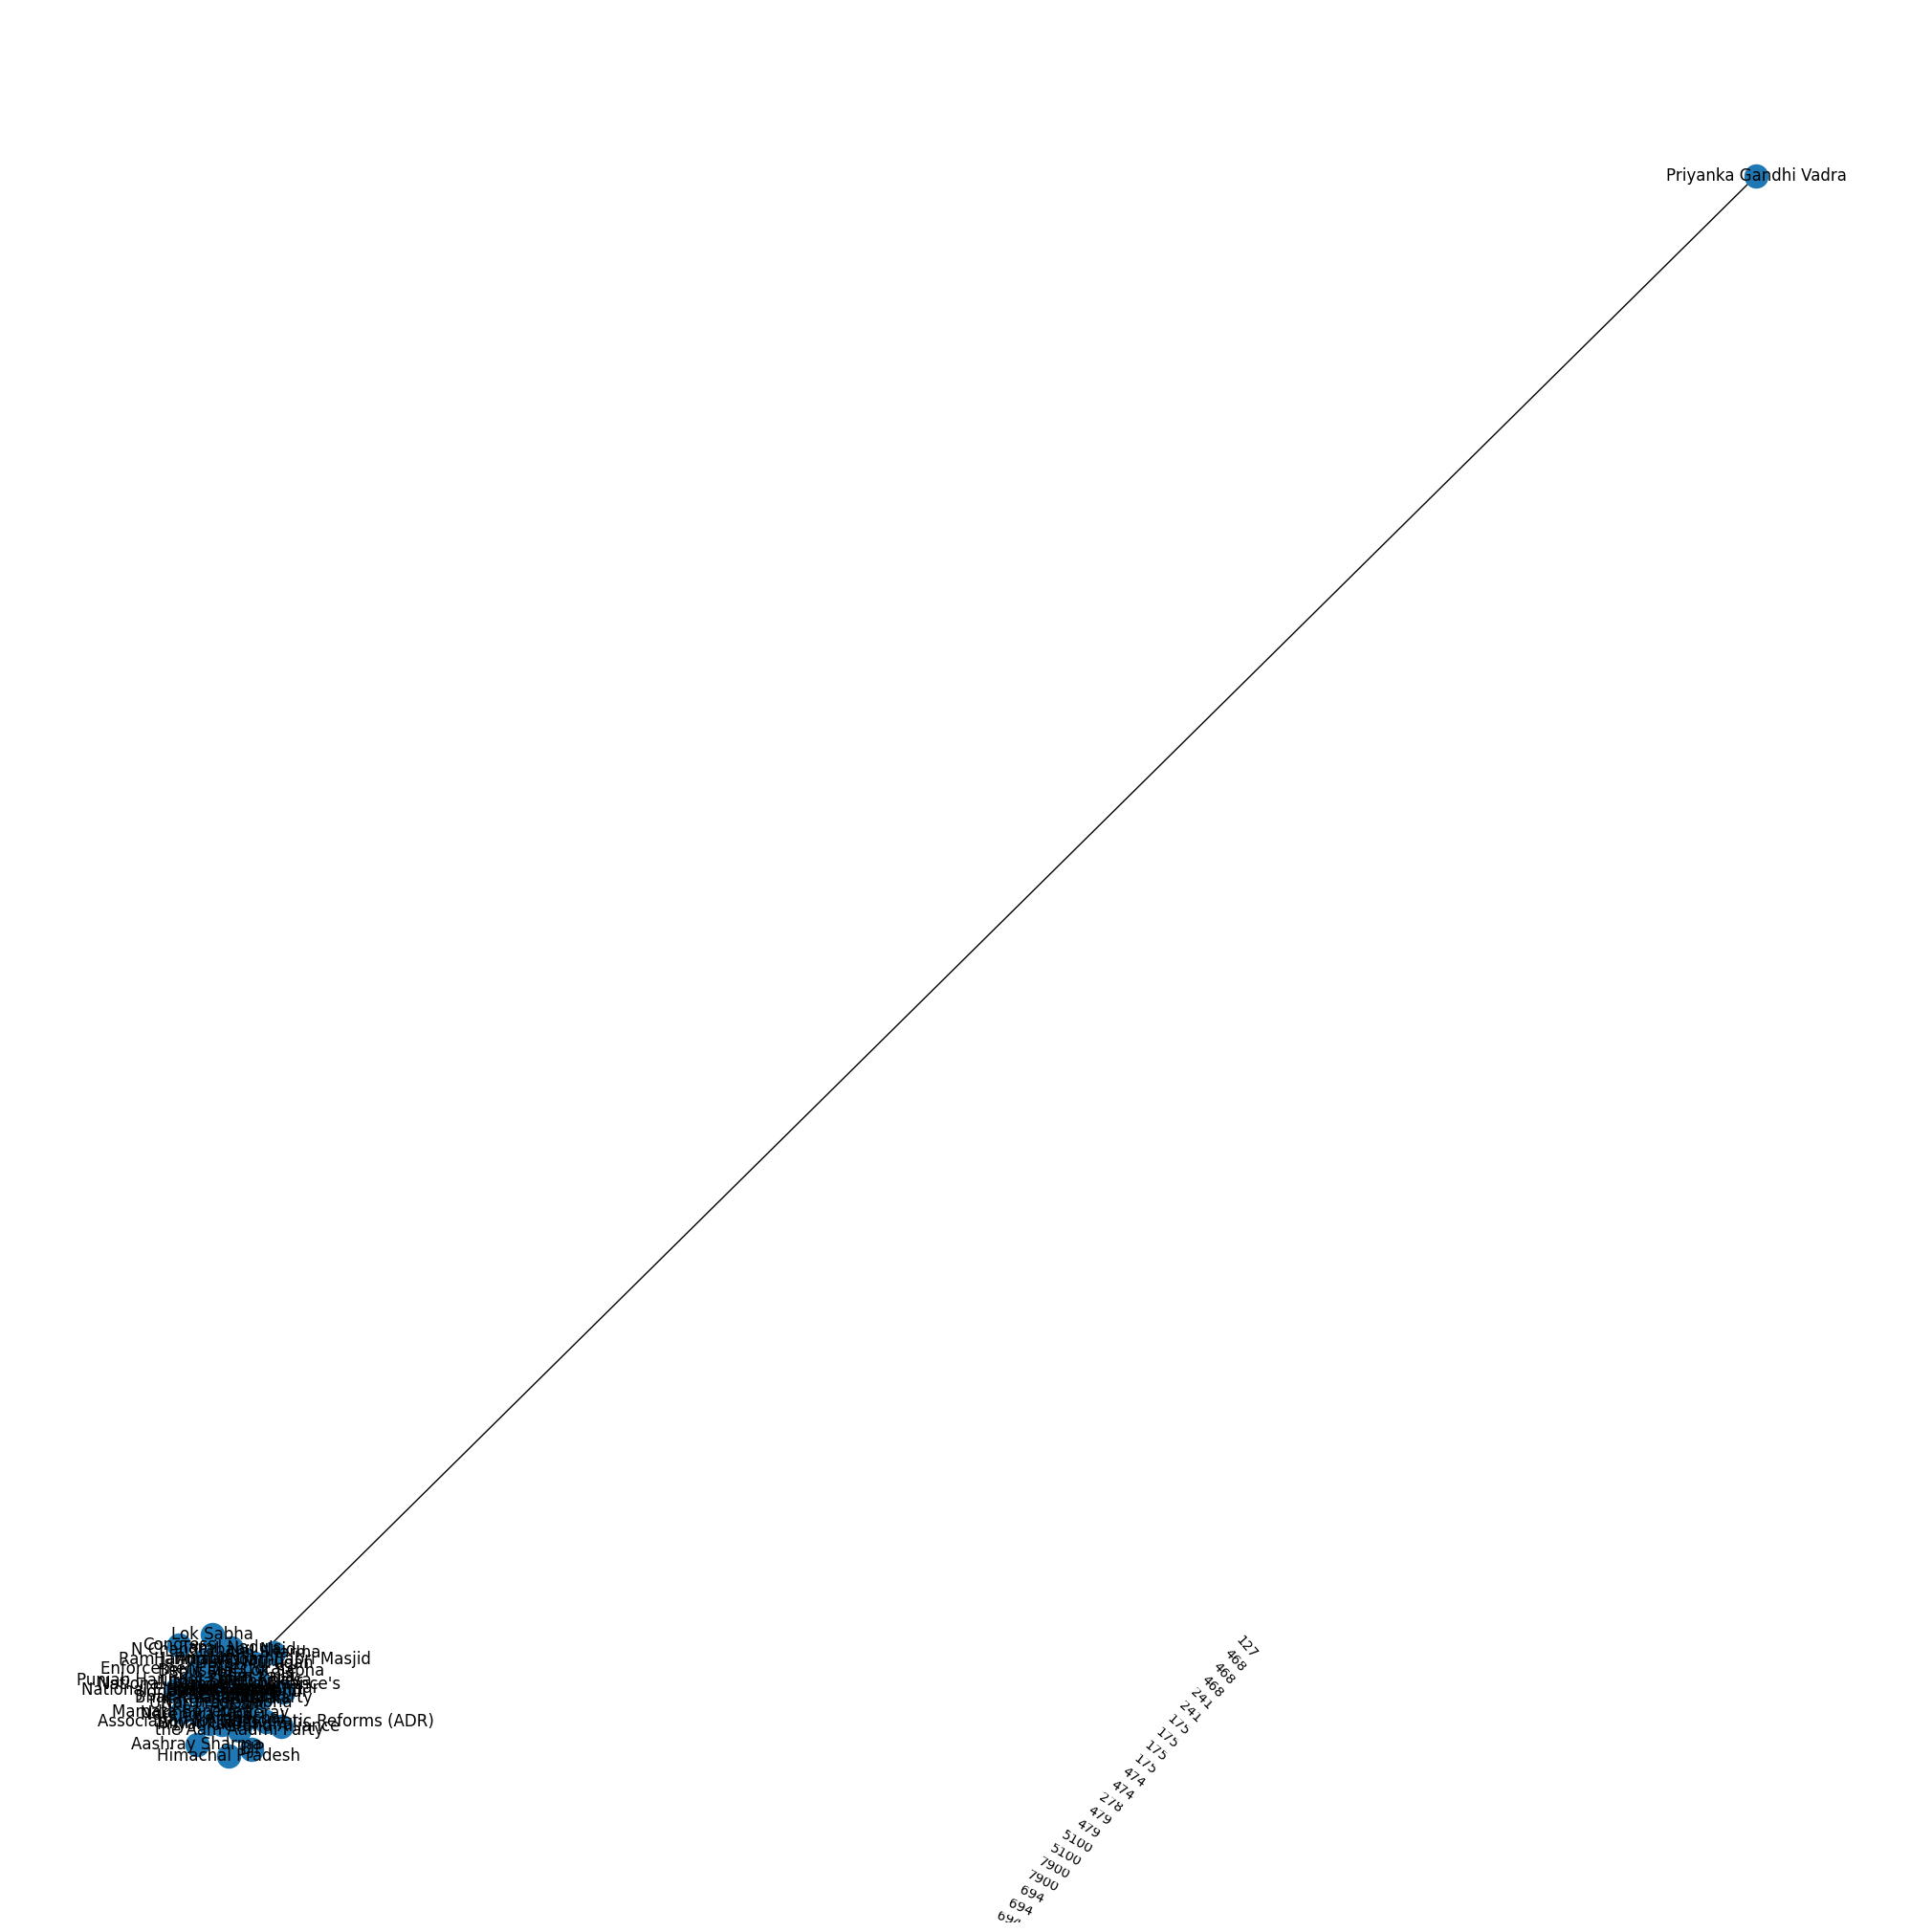

In [451]:
# India Times Reshares
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib


plt.rcParams["figure.figsize"] = [20,20]
plt.rcParams["figure.autolayout"] = True

labeled_df = pd.read_excel("IND/Politics/india_times.xlsx")
labeled_df["Reshares"]

it_dict = dict()

polidf = pd.read_csv("IND/"+p+" Political News.csv")

polidf["Reshares"] = labeled_df["Reshares"]

for index, row in polidf.iterrows():
        text = row["News Abstract"]

        article = nlp(text)
        nodes = []

  #only considering relevant entities 
        entities = ["ORG", "PERSON", "NORP", "EVENT", "LAW", "MONEY"]

        for x in article.ents:
            if x.label_ in entities:
                nodes.append(x.text)
                if it_dict.get(x.text):
                    it_dict[x.text].append(  (round(row["Positive Sentiment Score"],2),round(row["Neutral Sentiment Score"],2), round(row["Negative Sentiment Score"],2), row["Reshares"] ) )
                else:
                    it_dict[x.text] =  [ (round(row["Positive Sentiment Score"],2),round(row["Neutral Sentiment Score"],2), round(row["Negative Sentiment Score"],2), row["Reshares"] ) ]

        # print(nodes)

print(len(it_dict))
for node, v in it_dict.items():
    print(node, v)
    resh = 0
    pos = 0
    neu = 0
    neg = 0
    for e in v:
          resh = resh + e[3]
          pos = pos+ e[0]
          neu = neu + e[1]
          neg = neg + e[2]
    print(resh)
    print(pos/len(v))
    print(neu/len(v))
    print(neg/len(v))

india_times_graph  = nx.Graph()
for k,v in it_dict.items():
    india_times_graph.add_node(k)
    for edge in v:

        india_times_graph.add_node("News Reader")
        
        india_times_graph.add_weighted_edges_from([ ("News Reader", k, edge[3] )], color = "red")

weight_labels= nx.get_edge_attributes( india_times_graph,'weight')
#print(weight_labels)
nx.draw(india_times_graph, with_labels = True)
nx.draw_networkx_edge_labels(india_times_graph, pos =  nx.planar_layout(india_times_graph),edge_labels= weight_labels)

plt.show()

{'india_times': [{'Lok Sabha': {'avg_pos': 0.21, 'avg_neu': 0.4, 'avg_neg': 0.39, 'avg_pop': 0.67}}, {'EC': {'avg_pos': 0.03, 'avg_neu': 0.43, 'avg_neg': 0.54, 'avg_pop': 0.33}}, {'Narendra Modi': {'avg_pos': 0.03, 'avg_neu': 0.17, 'avg_neg': 0.79, 'avg_pop': 1.0}}, {'the Election Commission': {'avg_pos': 0.13, 'avg_neu': 0.55, 'avg_neg': 0.32, 'avg_pop': 0.5}}], 'first_post': [{'Congress': {'avg_pos': 0.11, 'avg_neu': 0.5, 'avg_neg': 0.39, 'avg_pop': 0.64}}, {'BJP': {'avg_pos': 0.09, 'avg_neu': 0.48, 'avg_neg': 0.43, 'avg_pop': 0.58}}, {'Sena': {'avg_pos': 0.06, 'avg_neu': 0.7, 'avg_neg': 0.24, 'avg_pop': 0.0}}], 'ndtv': [{'Congress': {'avg_pos': 0.22, 'avg_neu': 0.43, 'avg_neg': 0.35, 'avg_pop': 0.5}}, {'BJP': {'avg_pos': 0.11, 'avg_neu': 0.38, 'avg_neg': 0.51, 'avg_pop': 0.57}}, {'Lok Sabha': {'avg_pos': 0.1, 'avg_neu': 0.65, 'avg_neg': 0.25, 'avg_pop': 0.45}}], 'ind_exp': [{'Congress': {'avg_pos': 0.08, 'avg_neu': 0.55, 'avg_neg': 0.37, 'avg_pop': 0.44}}, {'Lok Sabha': {'avg_pos': 

/Users/sidheehande/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


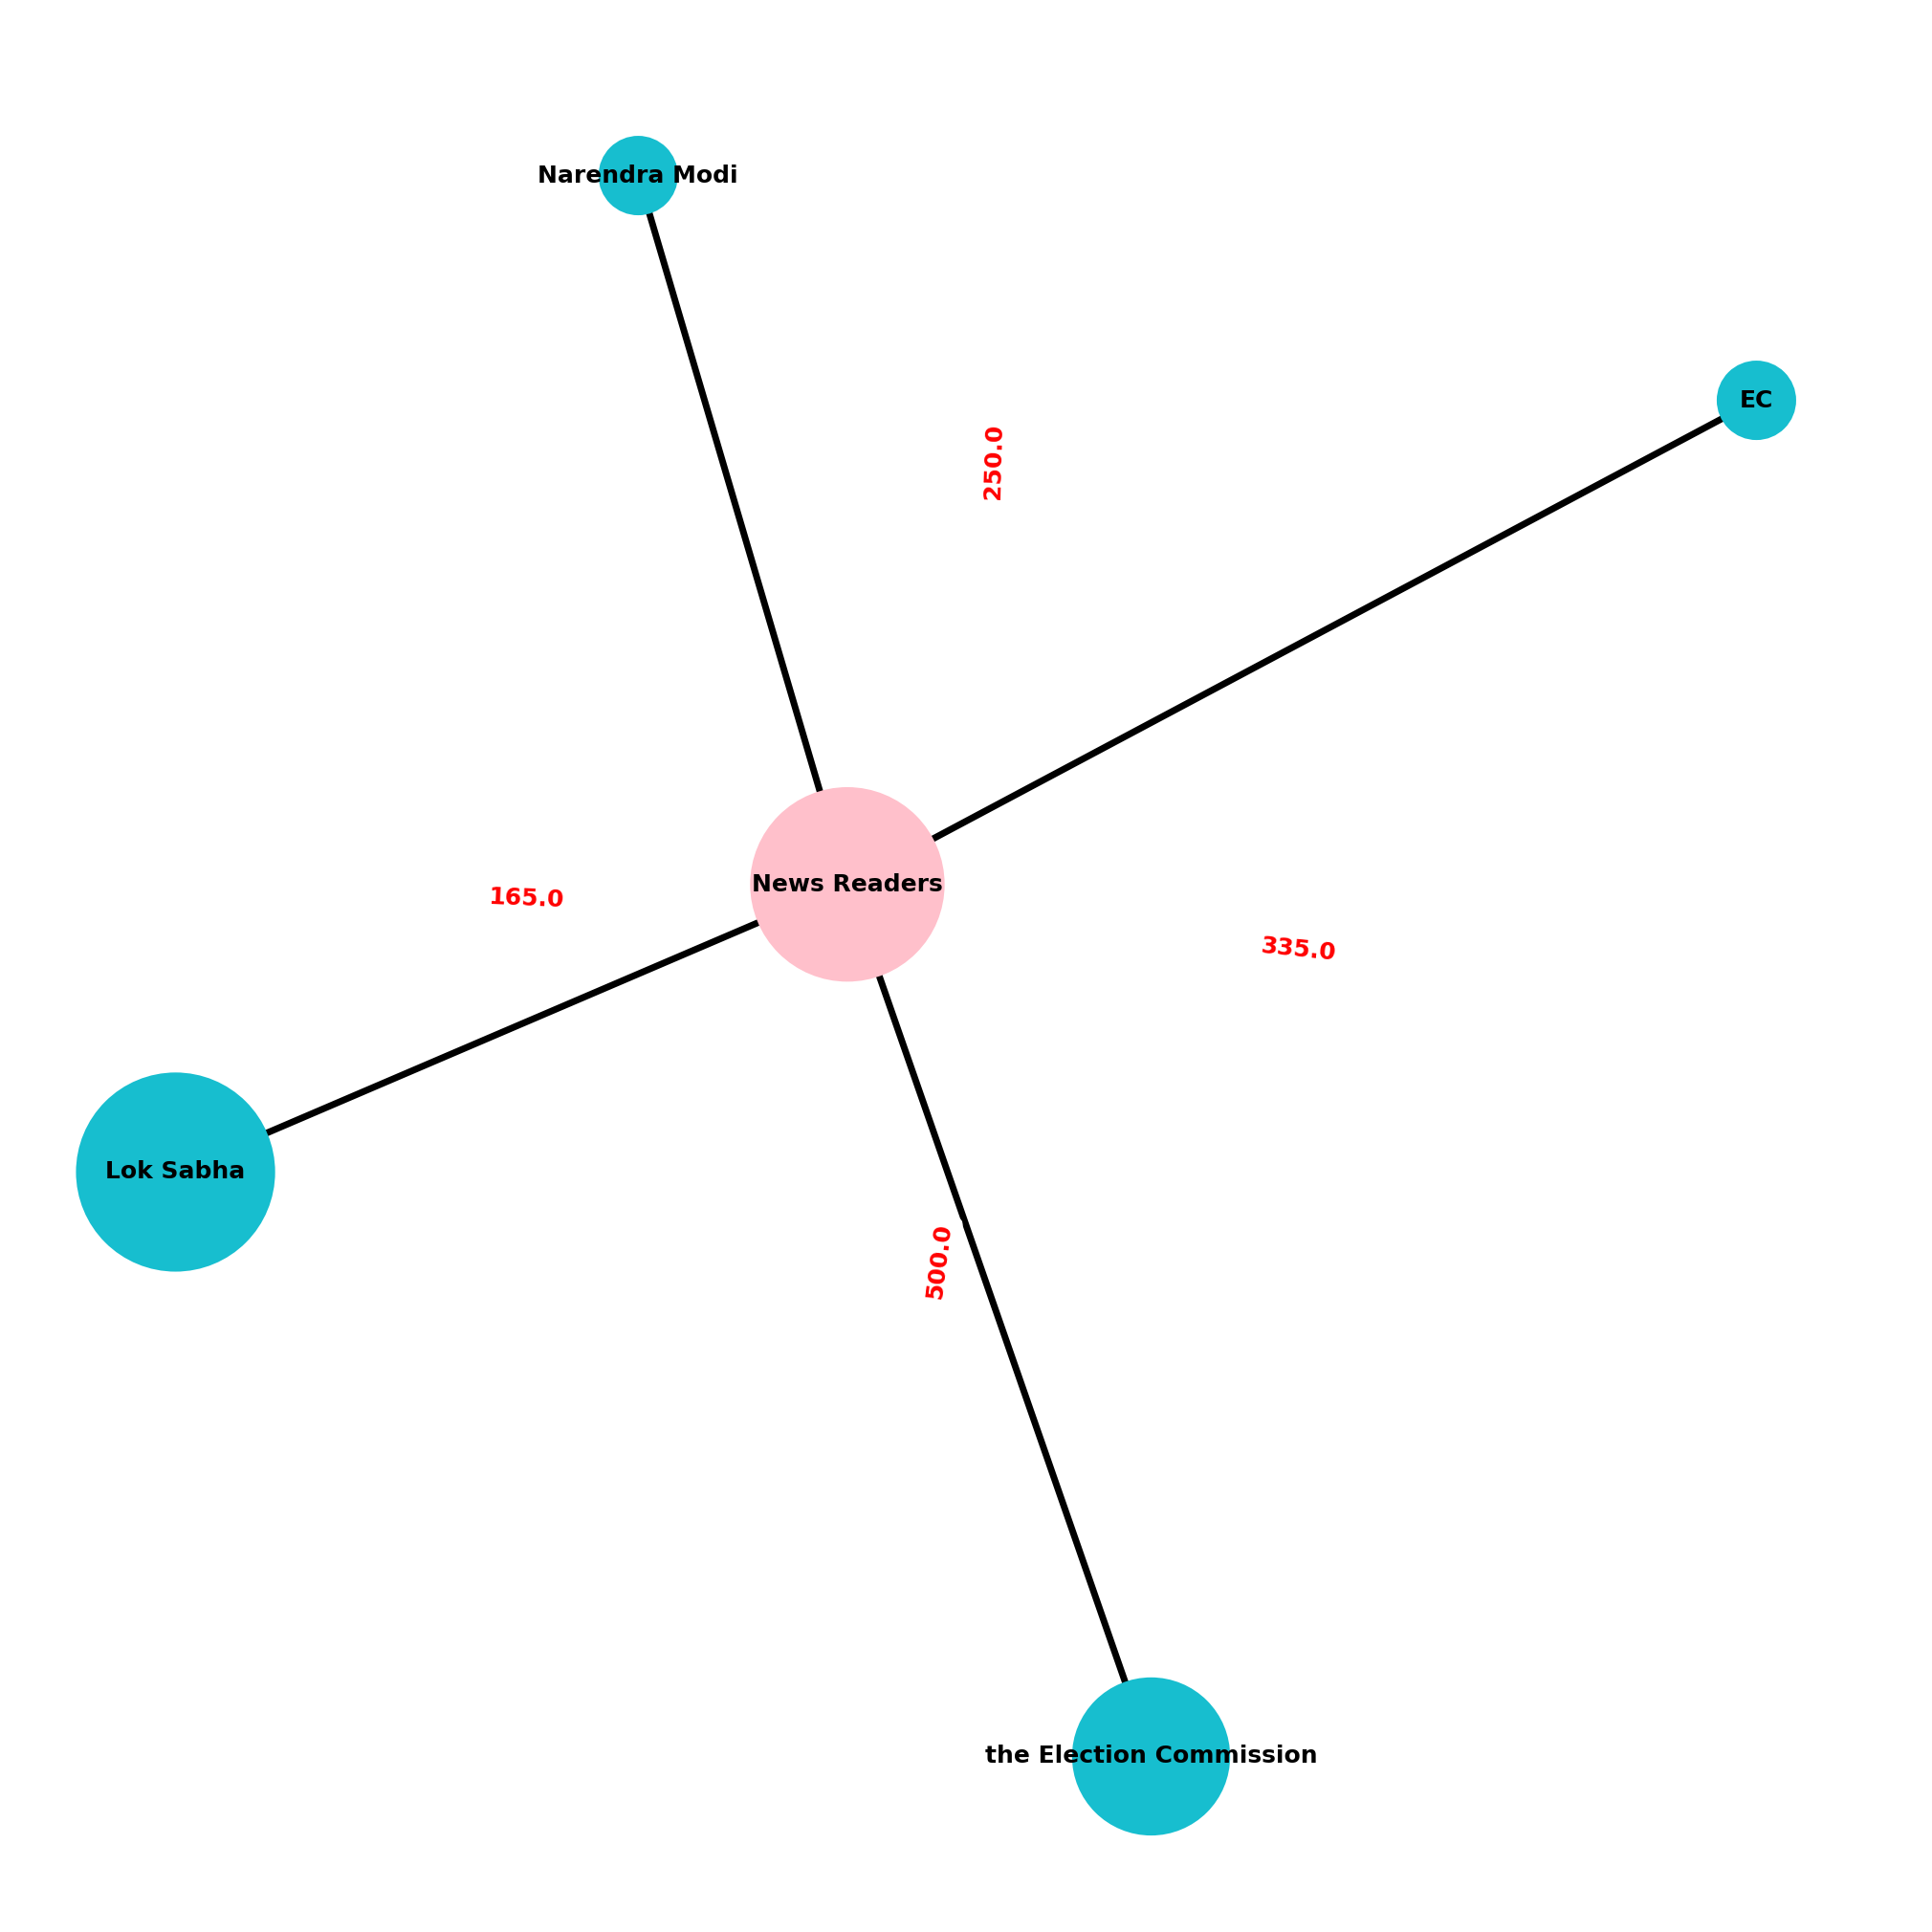

first_post
[0.2, 0.11, 0.09, 0.06]
[0.2, 0.39, 0.43, 0.24]
{'News Readers': 3, 'Congress': 1, 'BJP': 1, 'Sena': 1}
{('News Readers', 'Congress'): '320.0', ('News Readers', 'BJP'): '290.0', ('News Readers', 'Sena'): '0.0'}


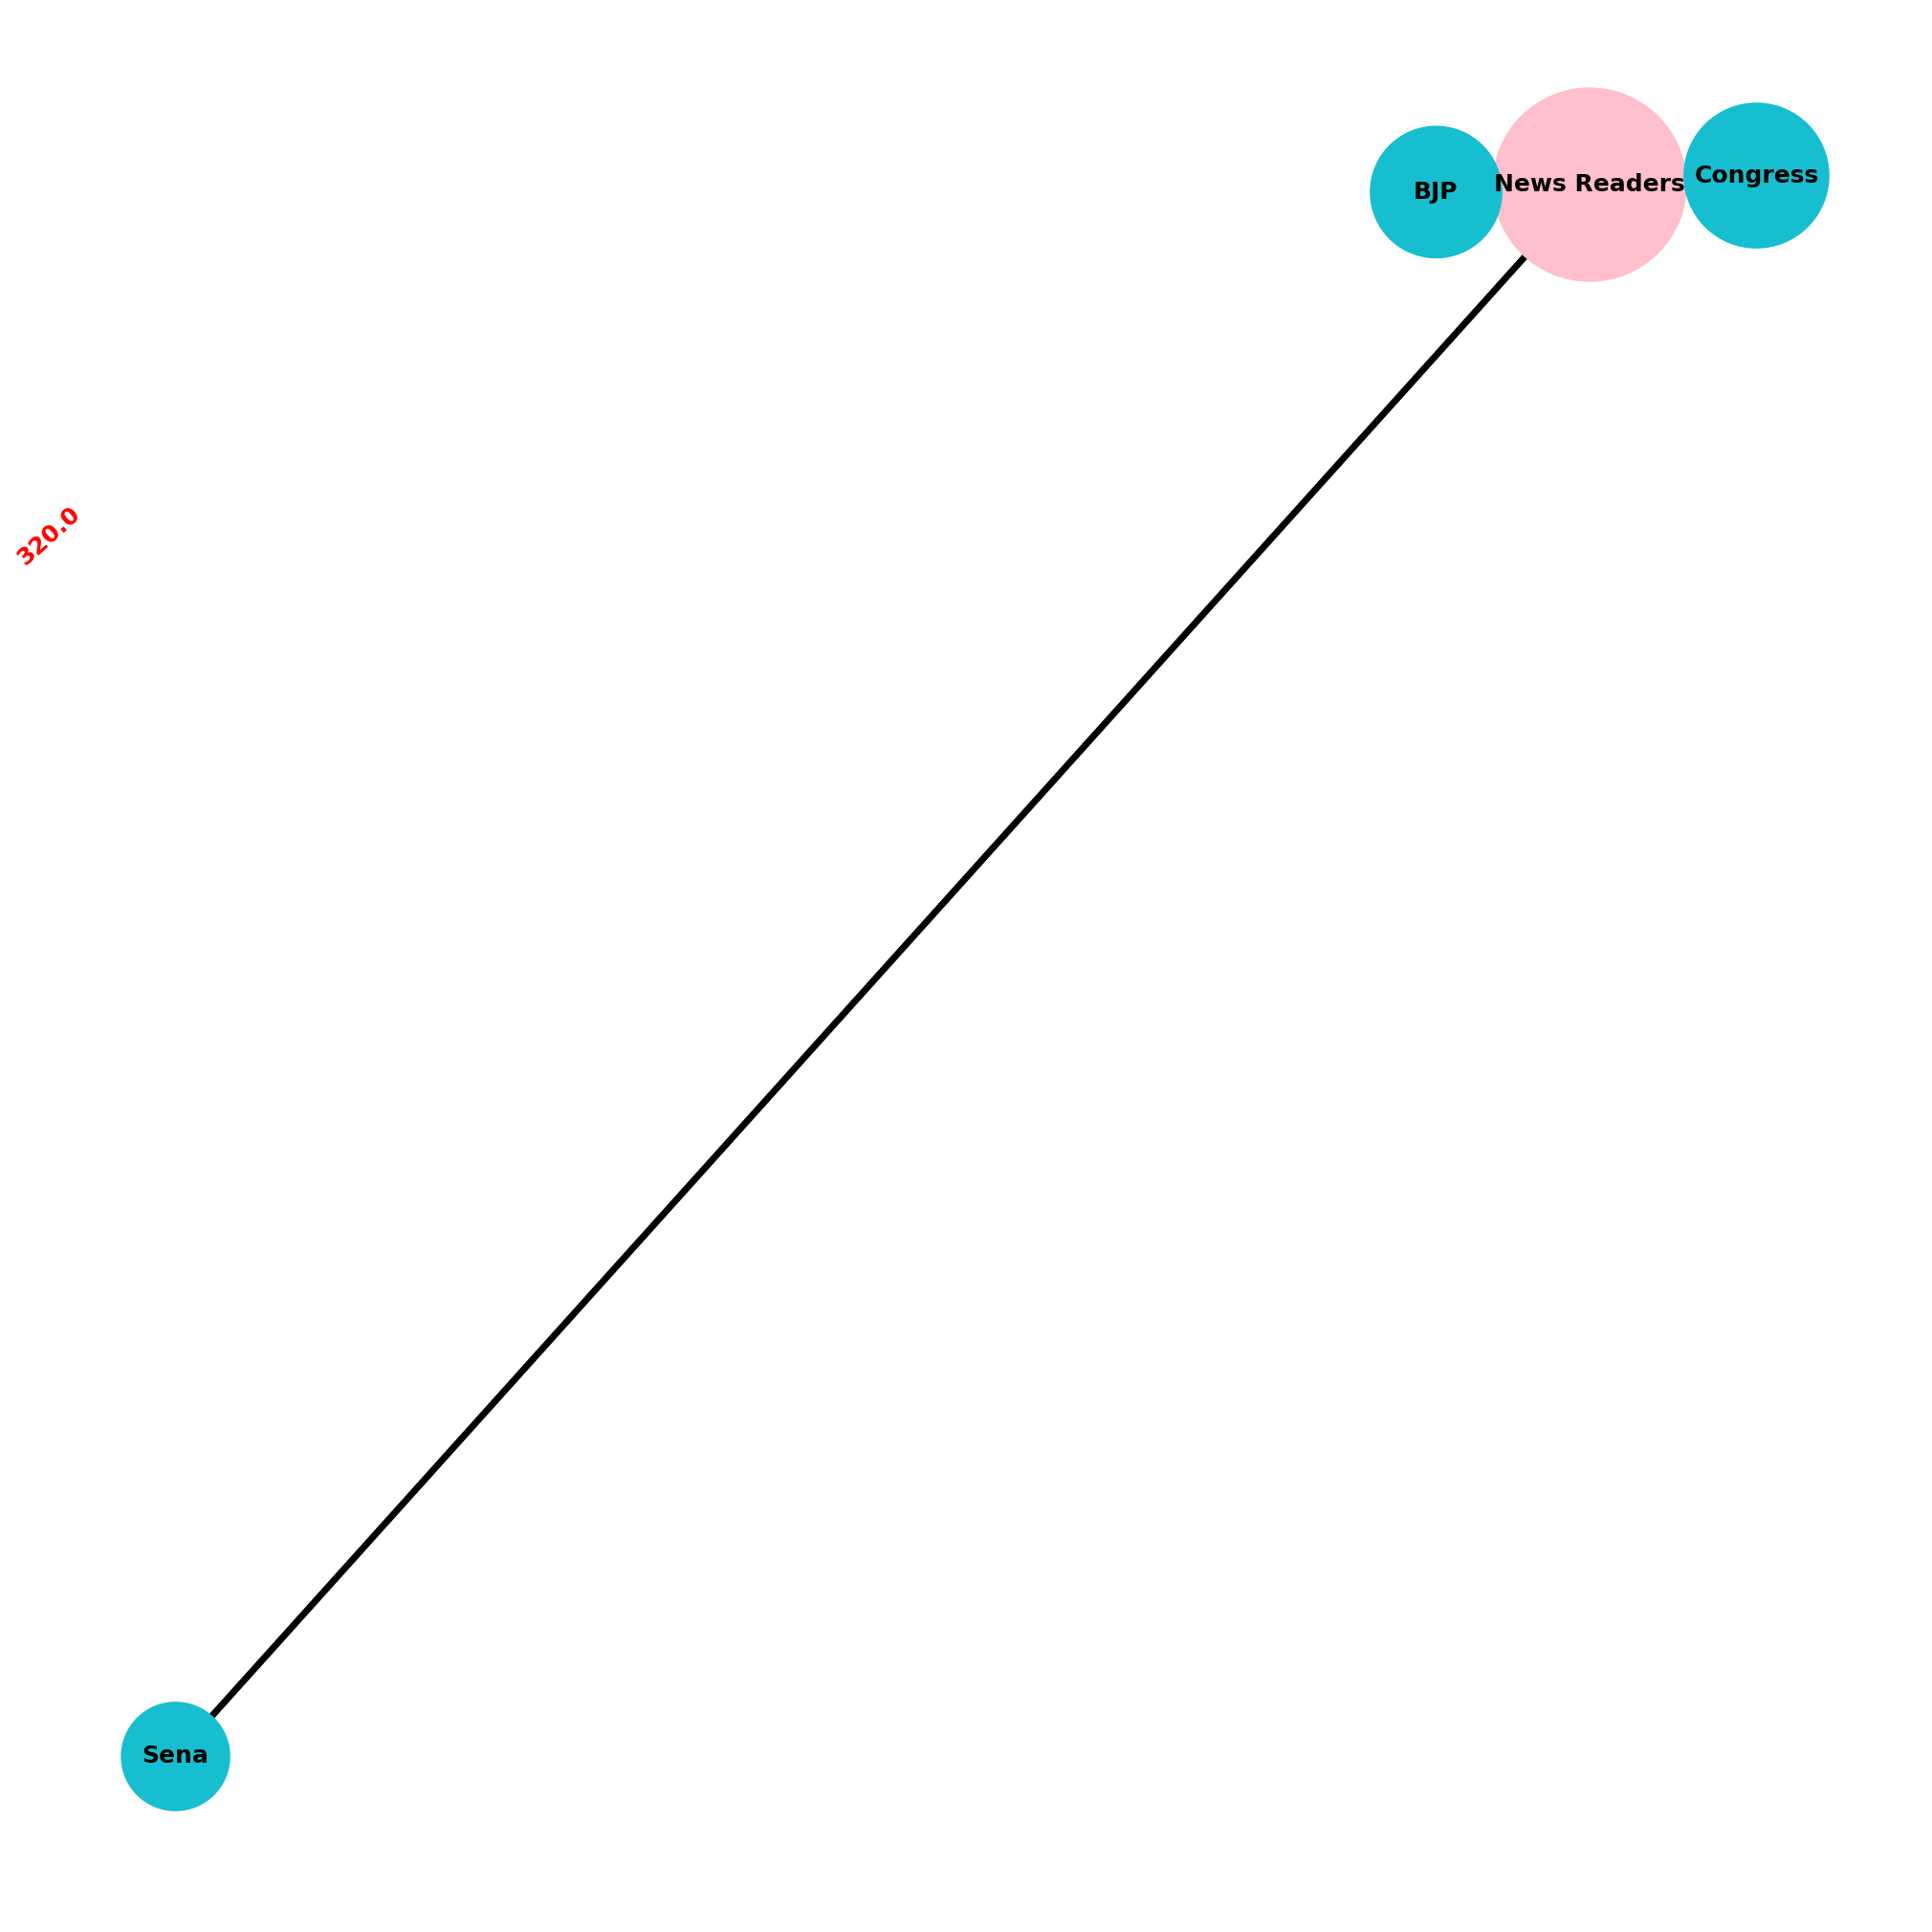

ndtv
[0.2, 0.22, 0.11, 0.1]
[0.2, 0.35, 0.51, 0.25]
{'News Readers': 3, 'Congress': 1, 'BJP': 1, 'Lok Sabha': 1}
{('News Readers', 'Congress'): '250.0', ('News Readers', 'BJP'): '285.0', ('News Readers', 'Lok Sabha'): '225.0'}


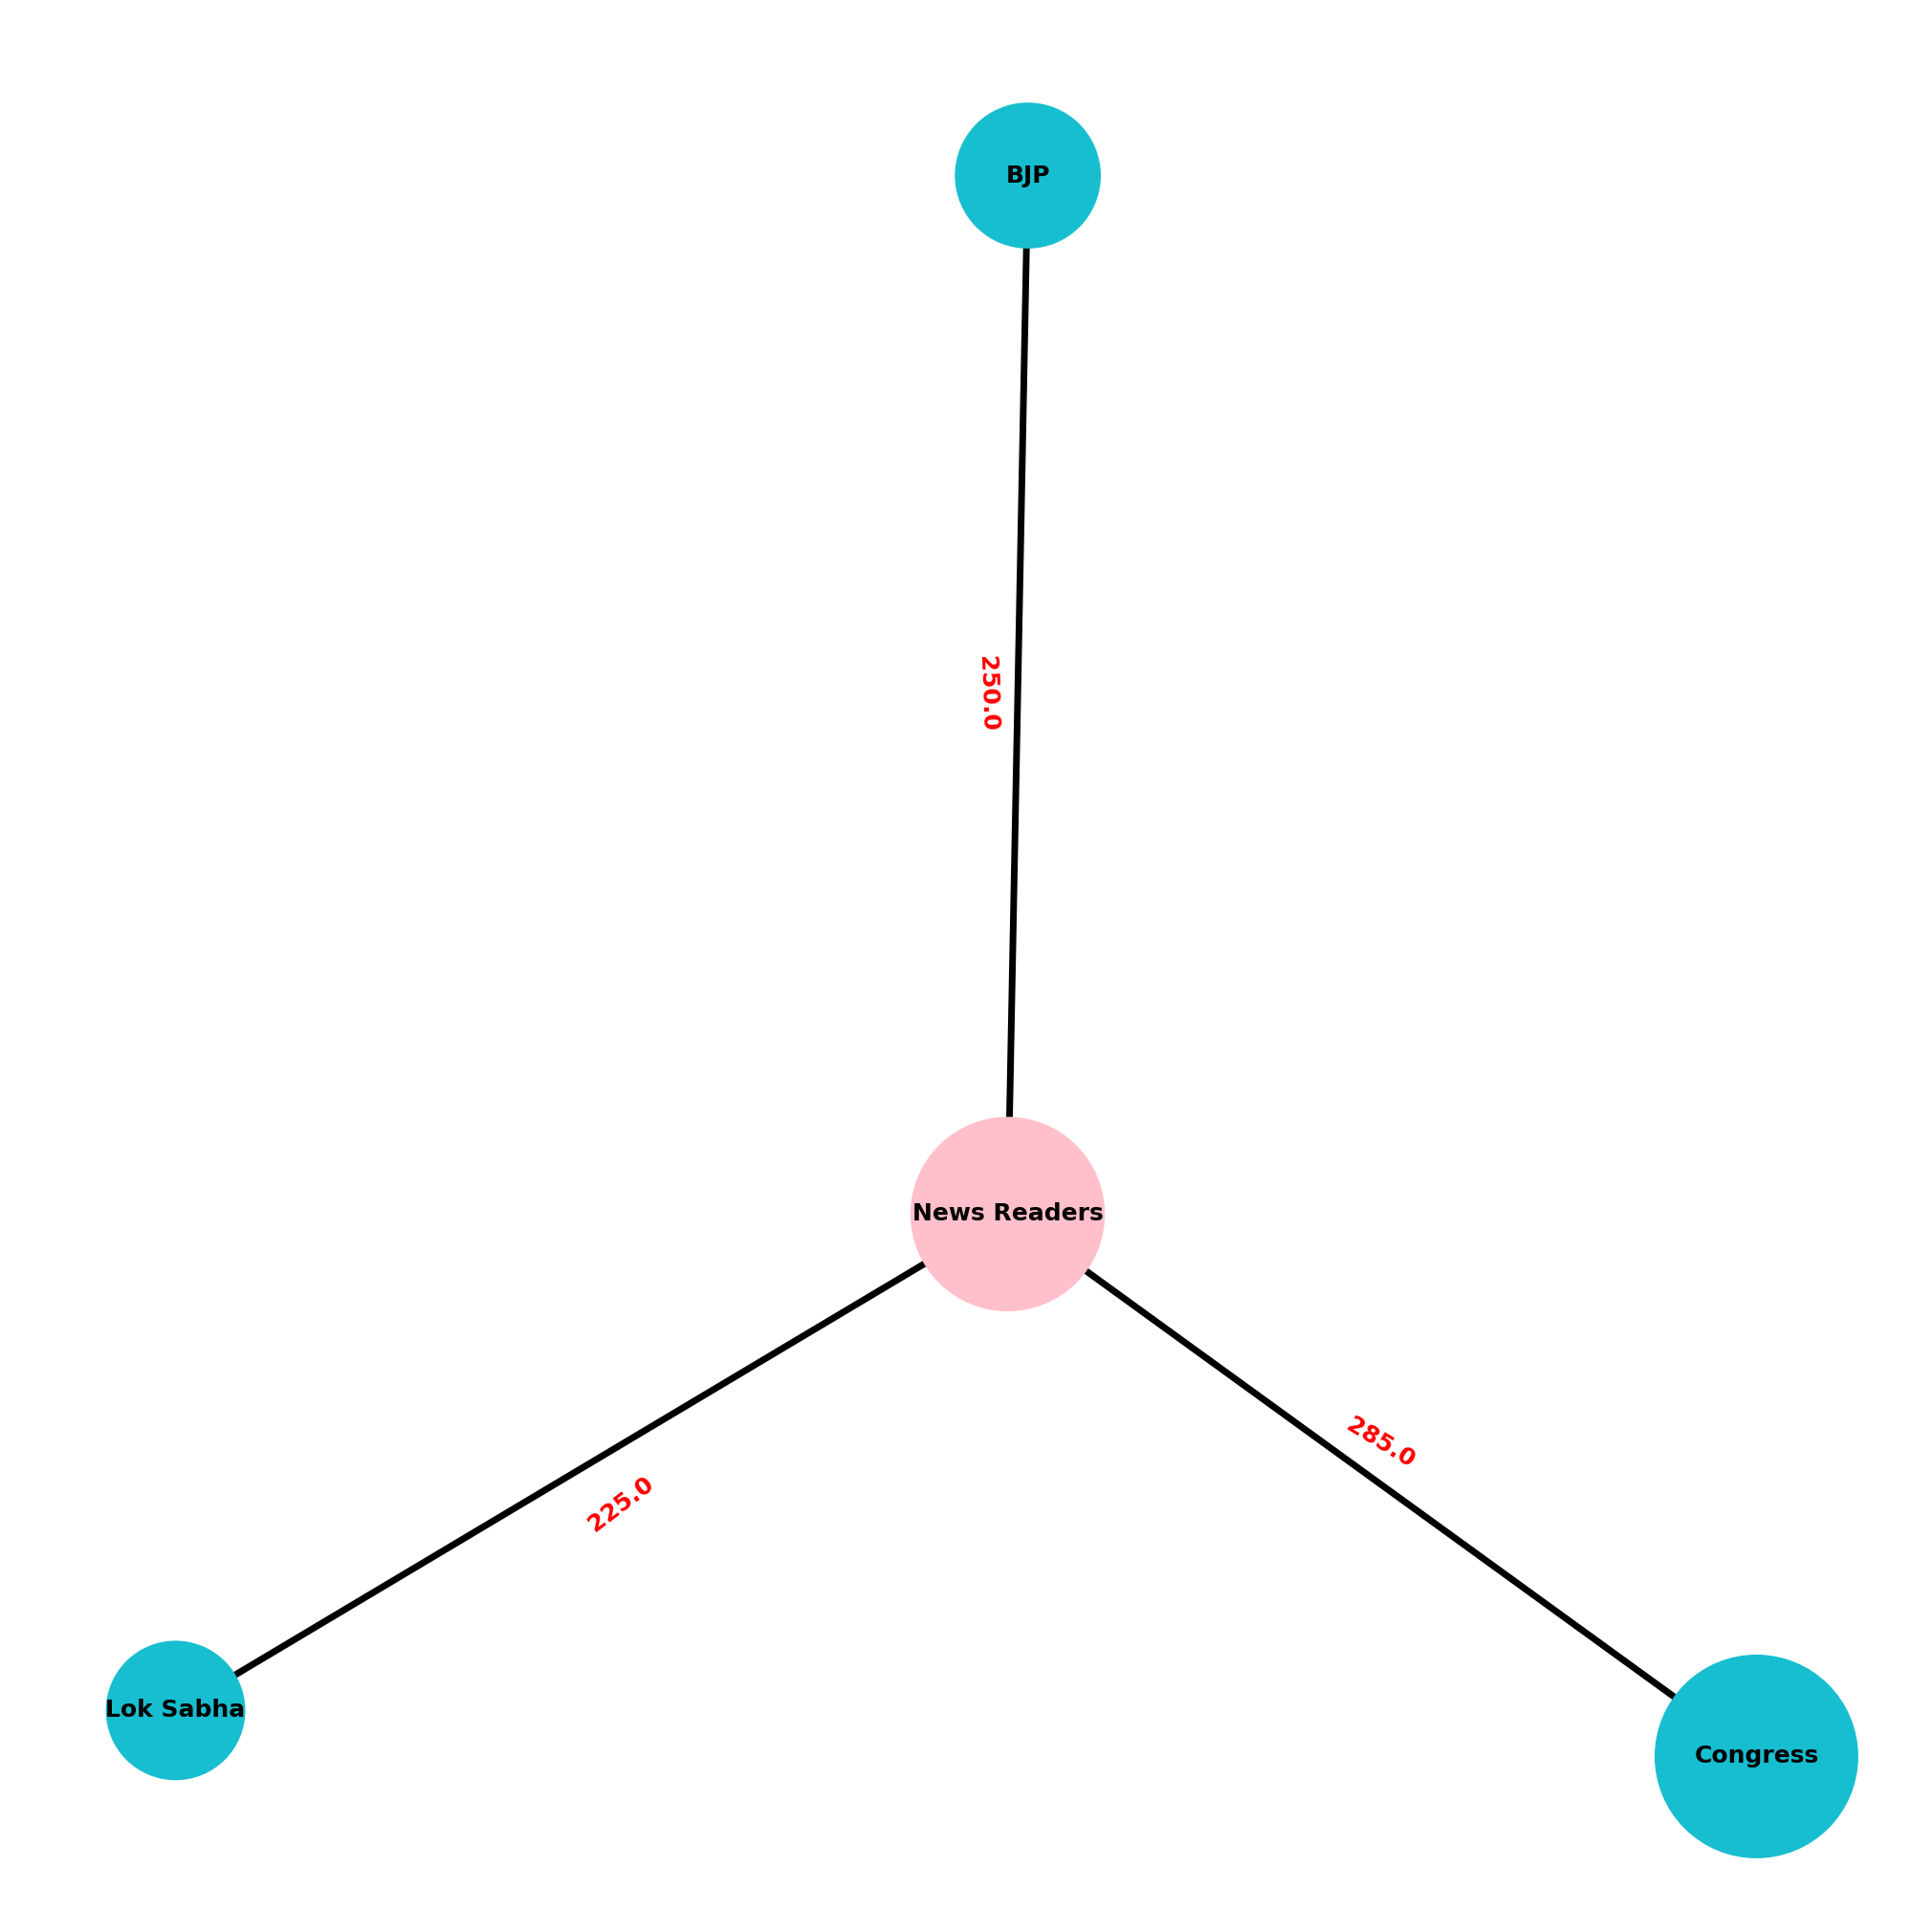

ind_exp
[0.2, 0.08, 0.07, 0.06]
[0.2, 0.37, 0.26, 0.34]
{'News Readers': 3, 'Congress': 1, 'Lok Sabha': 1, 'BJP': 1}
{('News Readers', 'Congress'): '220.0', ('News Readers', 'Lok Sabha'): '300.0', ('News Readers', 'BJP'): '100.0'}


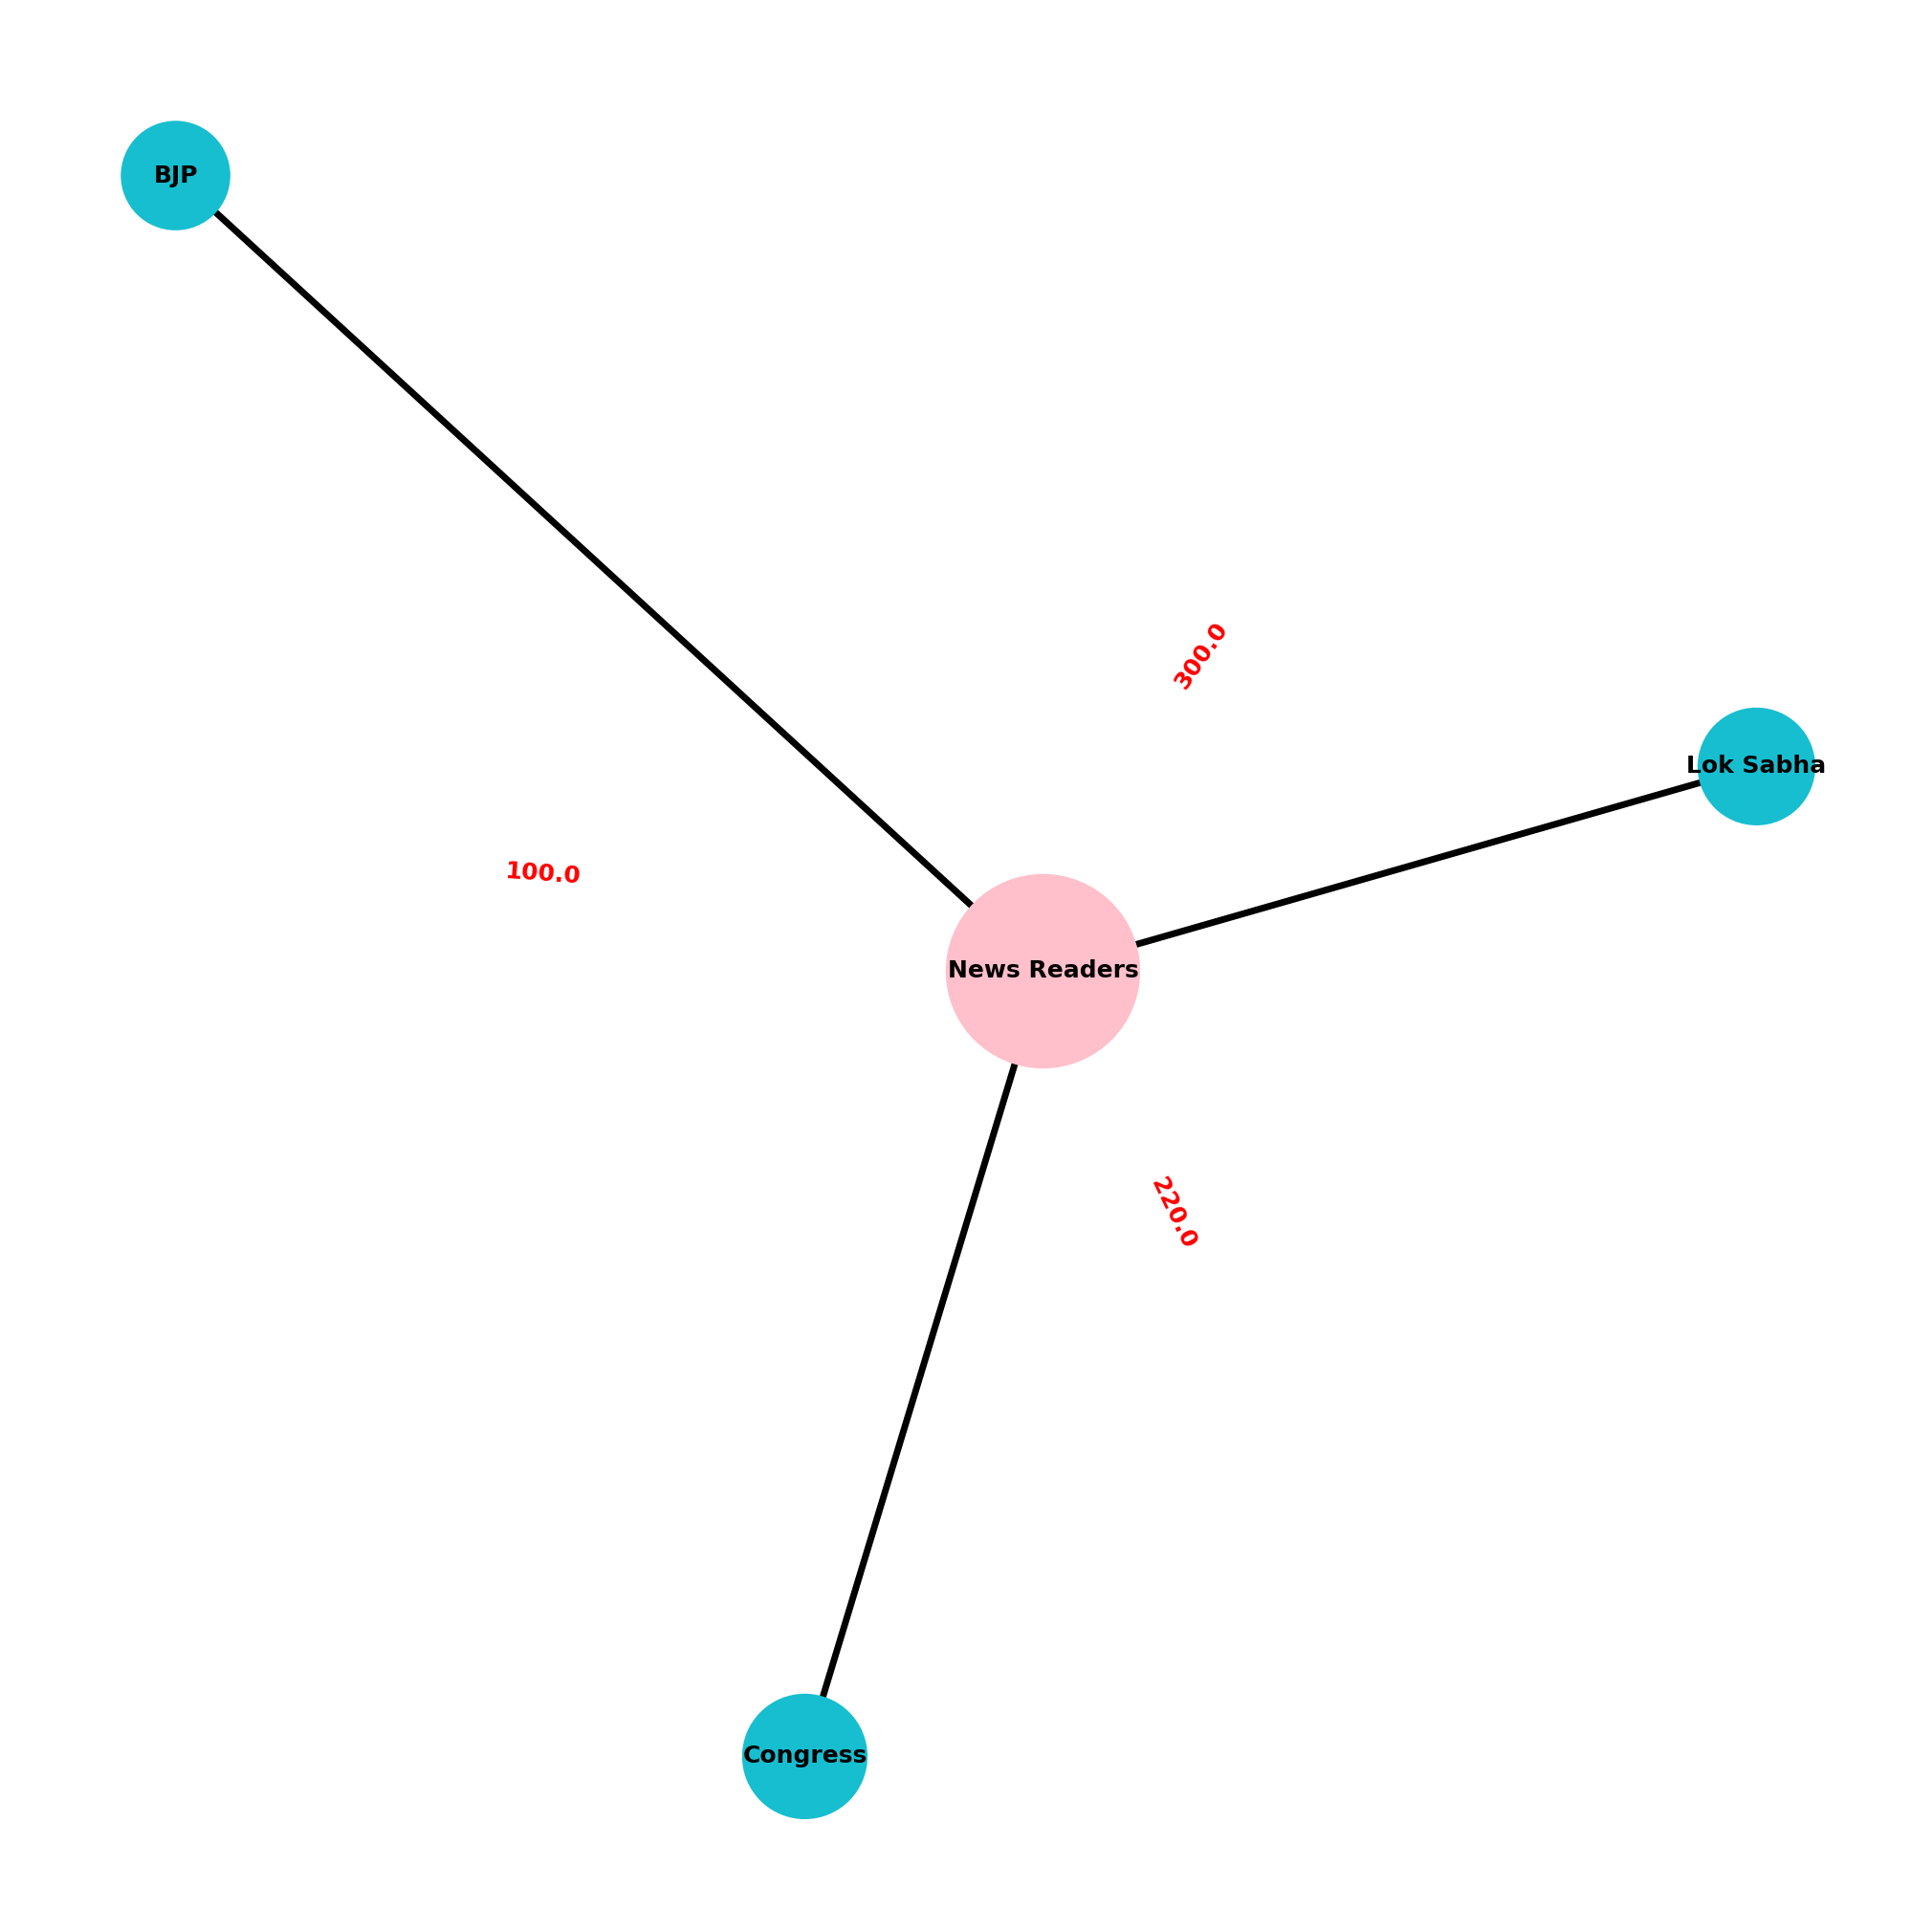

times_now
[0.2, 0.08, 0.1, 0.04]
[0.2, 0.18, 0.2, 0.22]
{'News Readers': 3, 'Lok Sabha': 1, 'Congress': 1, 'BJP': 1}
{('News Readers', 'Lok Sabha'): '180.0', ('News Readers', 'Congress'): '280.0', ('News Readers', 'BJP'): '250.0'}


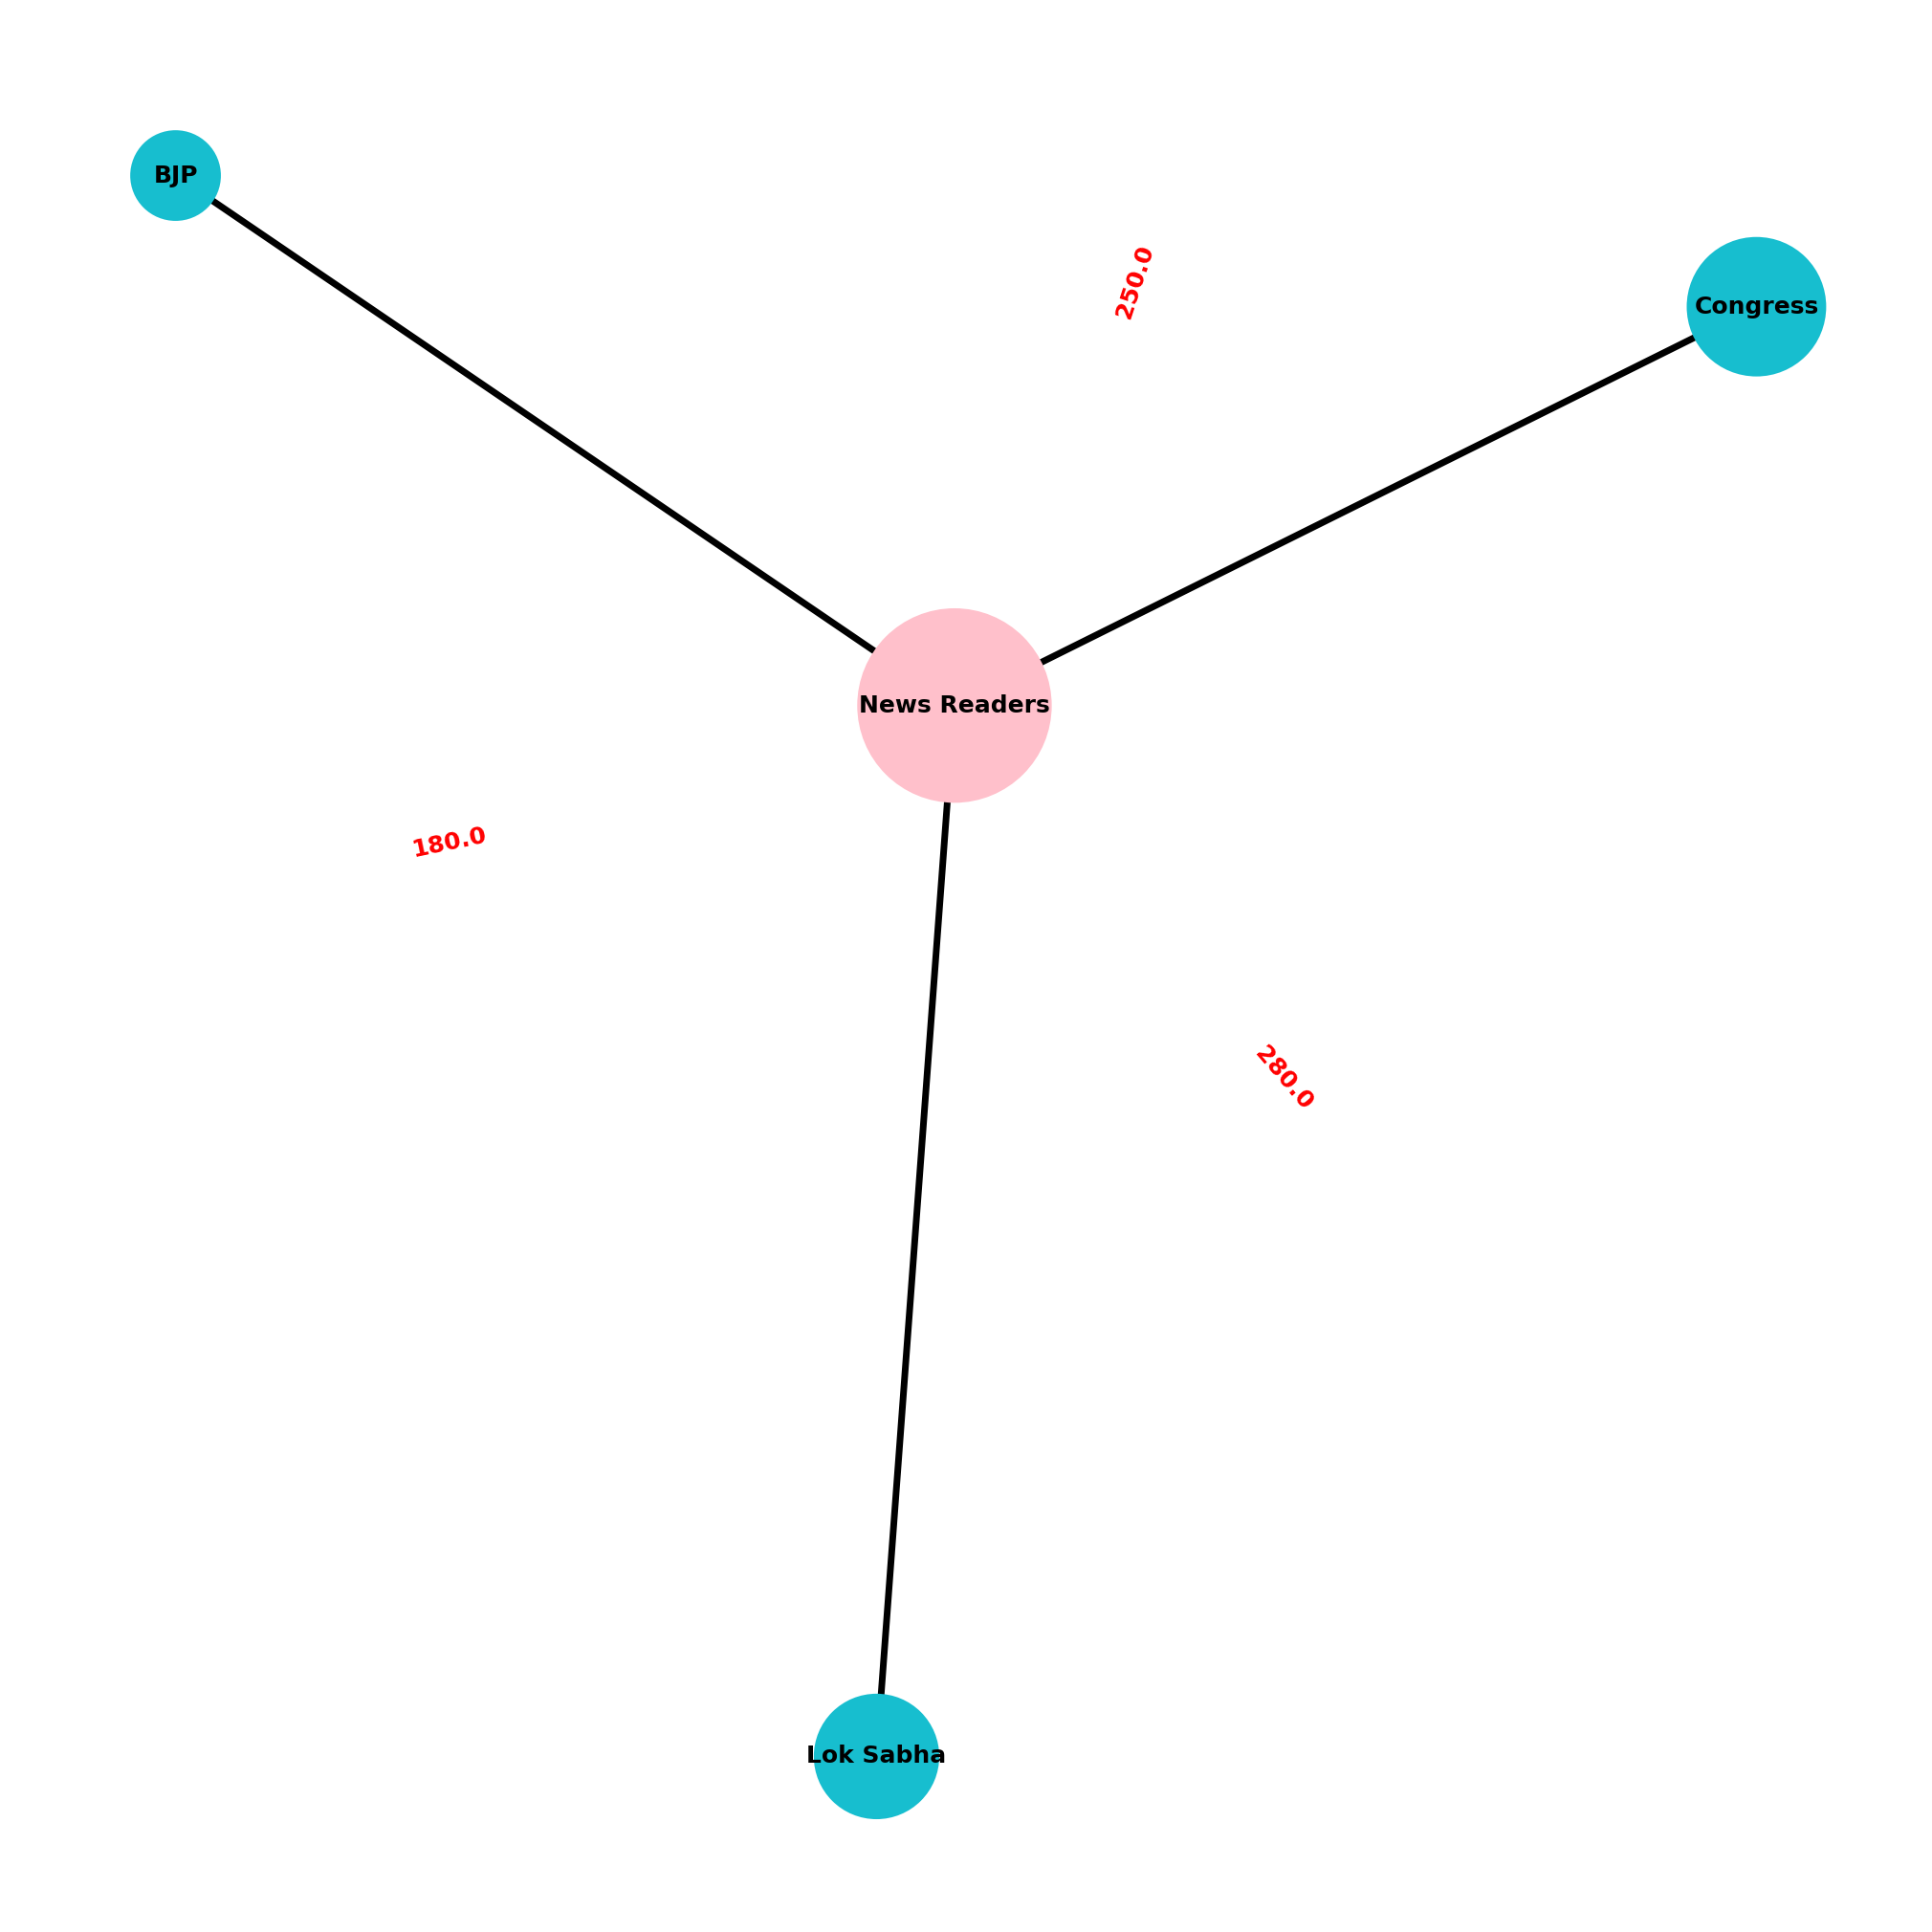

one_india
[0.2, 0.13, 0.15, 0.2, 0.08, 0.2, 0.09]
[0.2, 0.29, 0.12, 0.21, 0.16, 0.21, 0.07]
{'News Readers': 6, 'Congress': 1, 'Lok Sabha': 1, 'Rahul Gandhi': 1, 'Narendra Modi': 1, 'BJP': 1, "Narendra Modi's": 1}
{('News Readers', 'Congress'): '310.0', ('News Readers', 'Lok Sabha'): '415.0', ('News Readers', 'Rahul Gandhi'): '335.0', ('News Readers', 'Narendra Modi'): '430.0', ('News Readers', 'BJP'): '375.0', ('News Readers', "Narendra Modi's"): '500.0'}


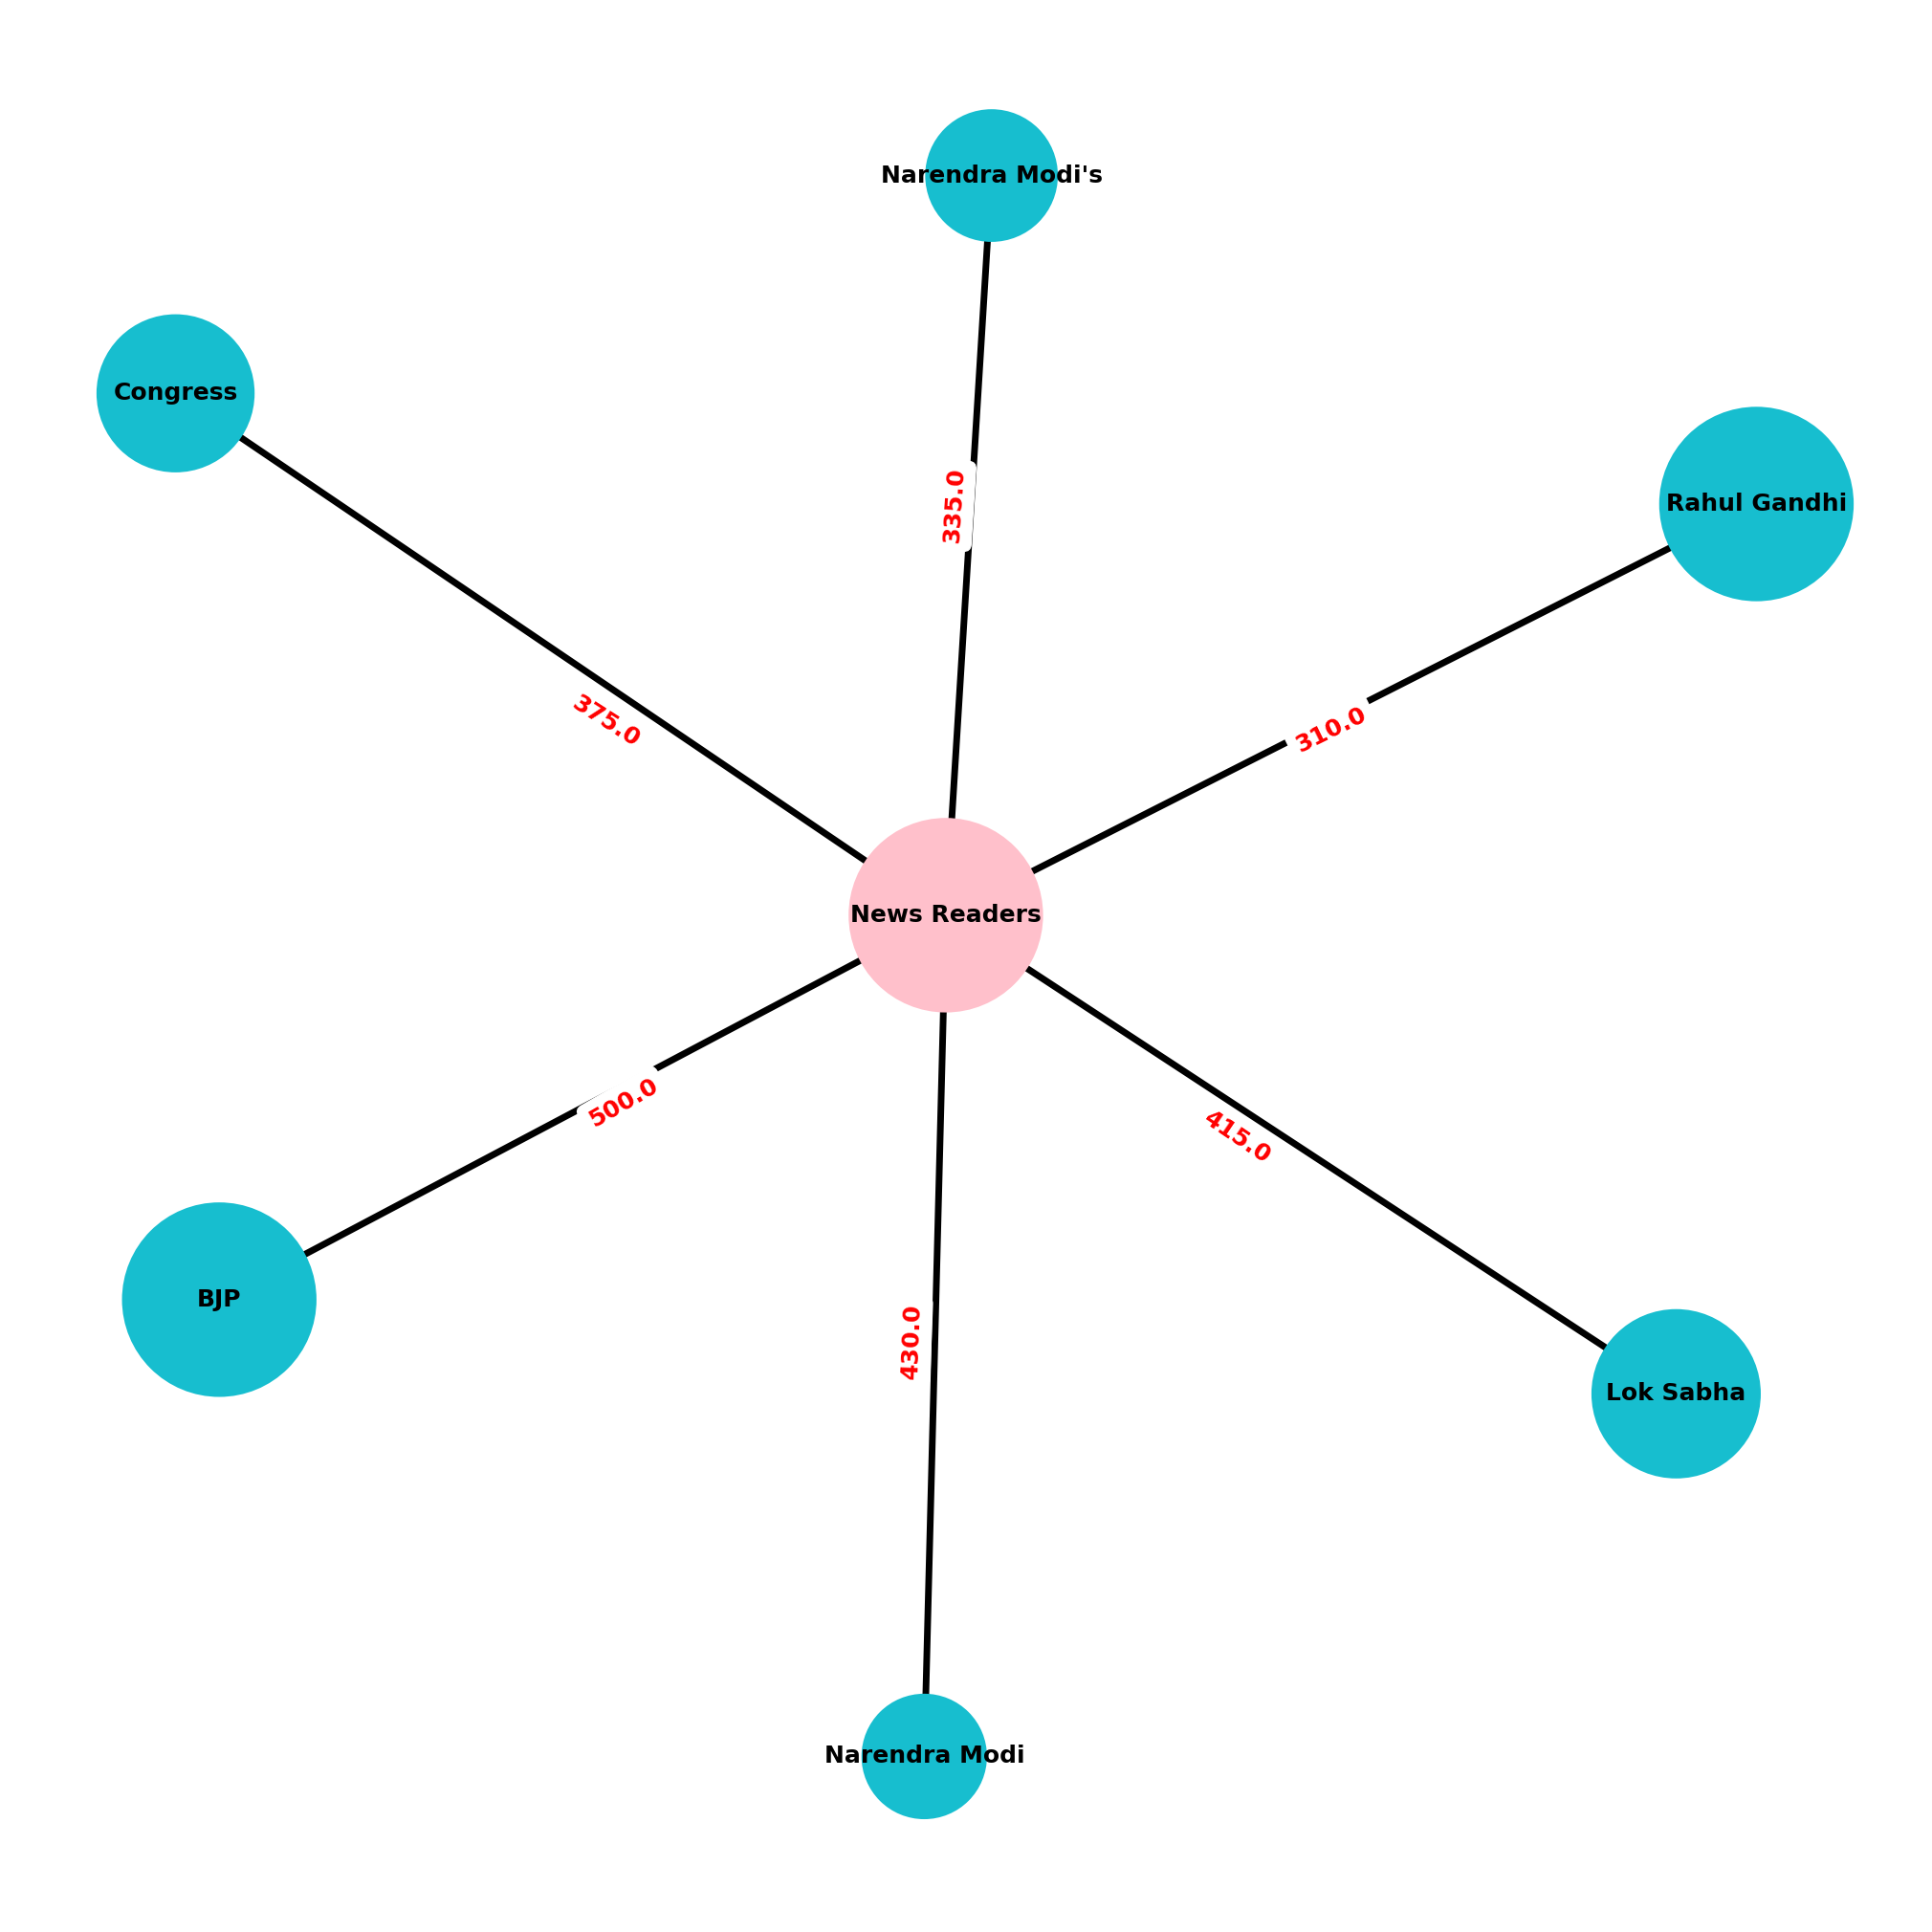

hind_time
[0.2, 0.22, 0.12, 0.05, 0.05]
[0.2, 0.37, 0.48, 0.69, 0.69]
{'News Readers': 4, 'BJP': 1, 'Congress': 1, 'Thackeray': 1, 'Sena': 1}
{('News Readers', 'BJP'): '375.0', ('News Readers', 'Congress'): '430.0', ('News Readers', 'Thackeray'): '500.0', ('News Readers', 'Sena'): '500.0'}


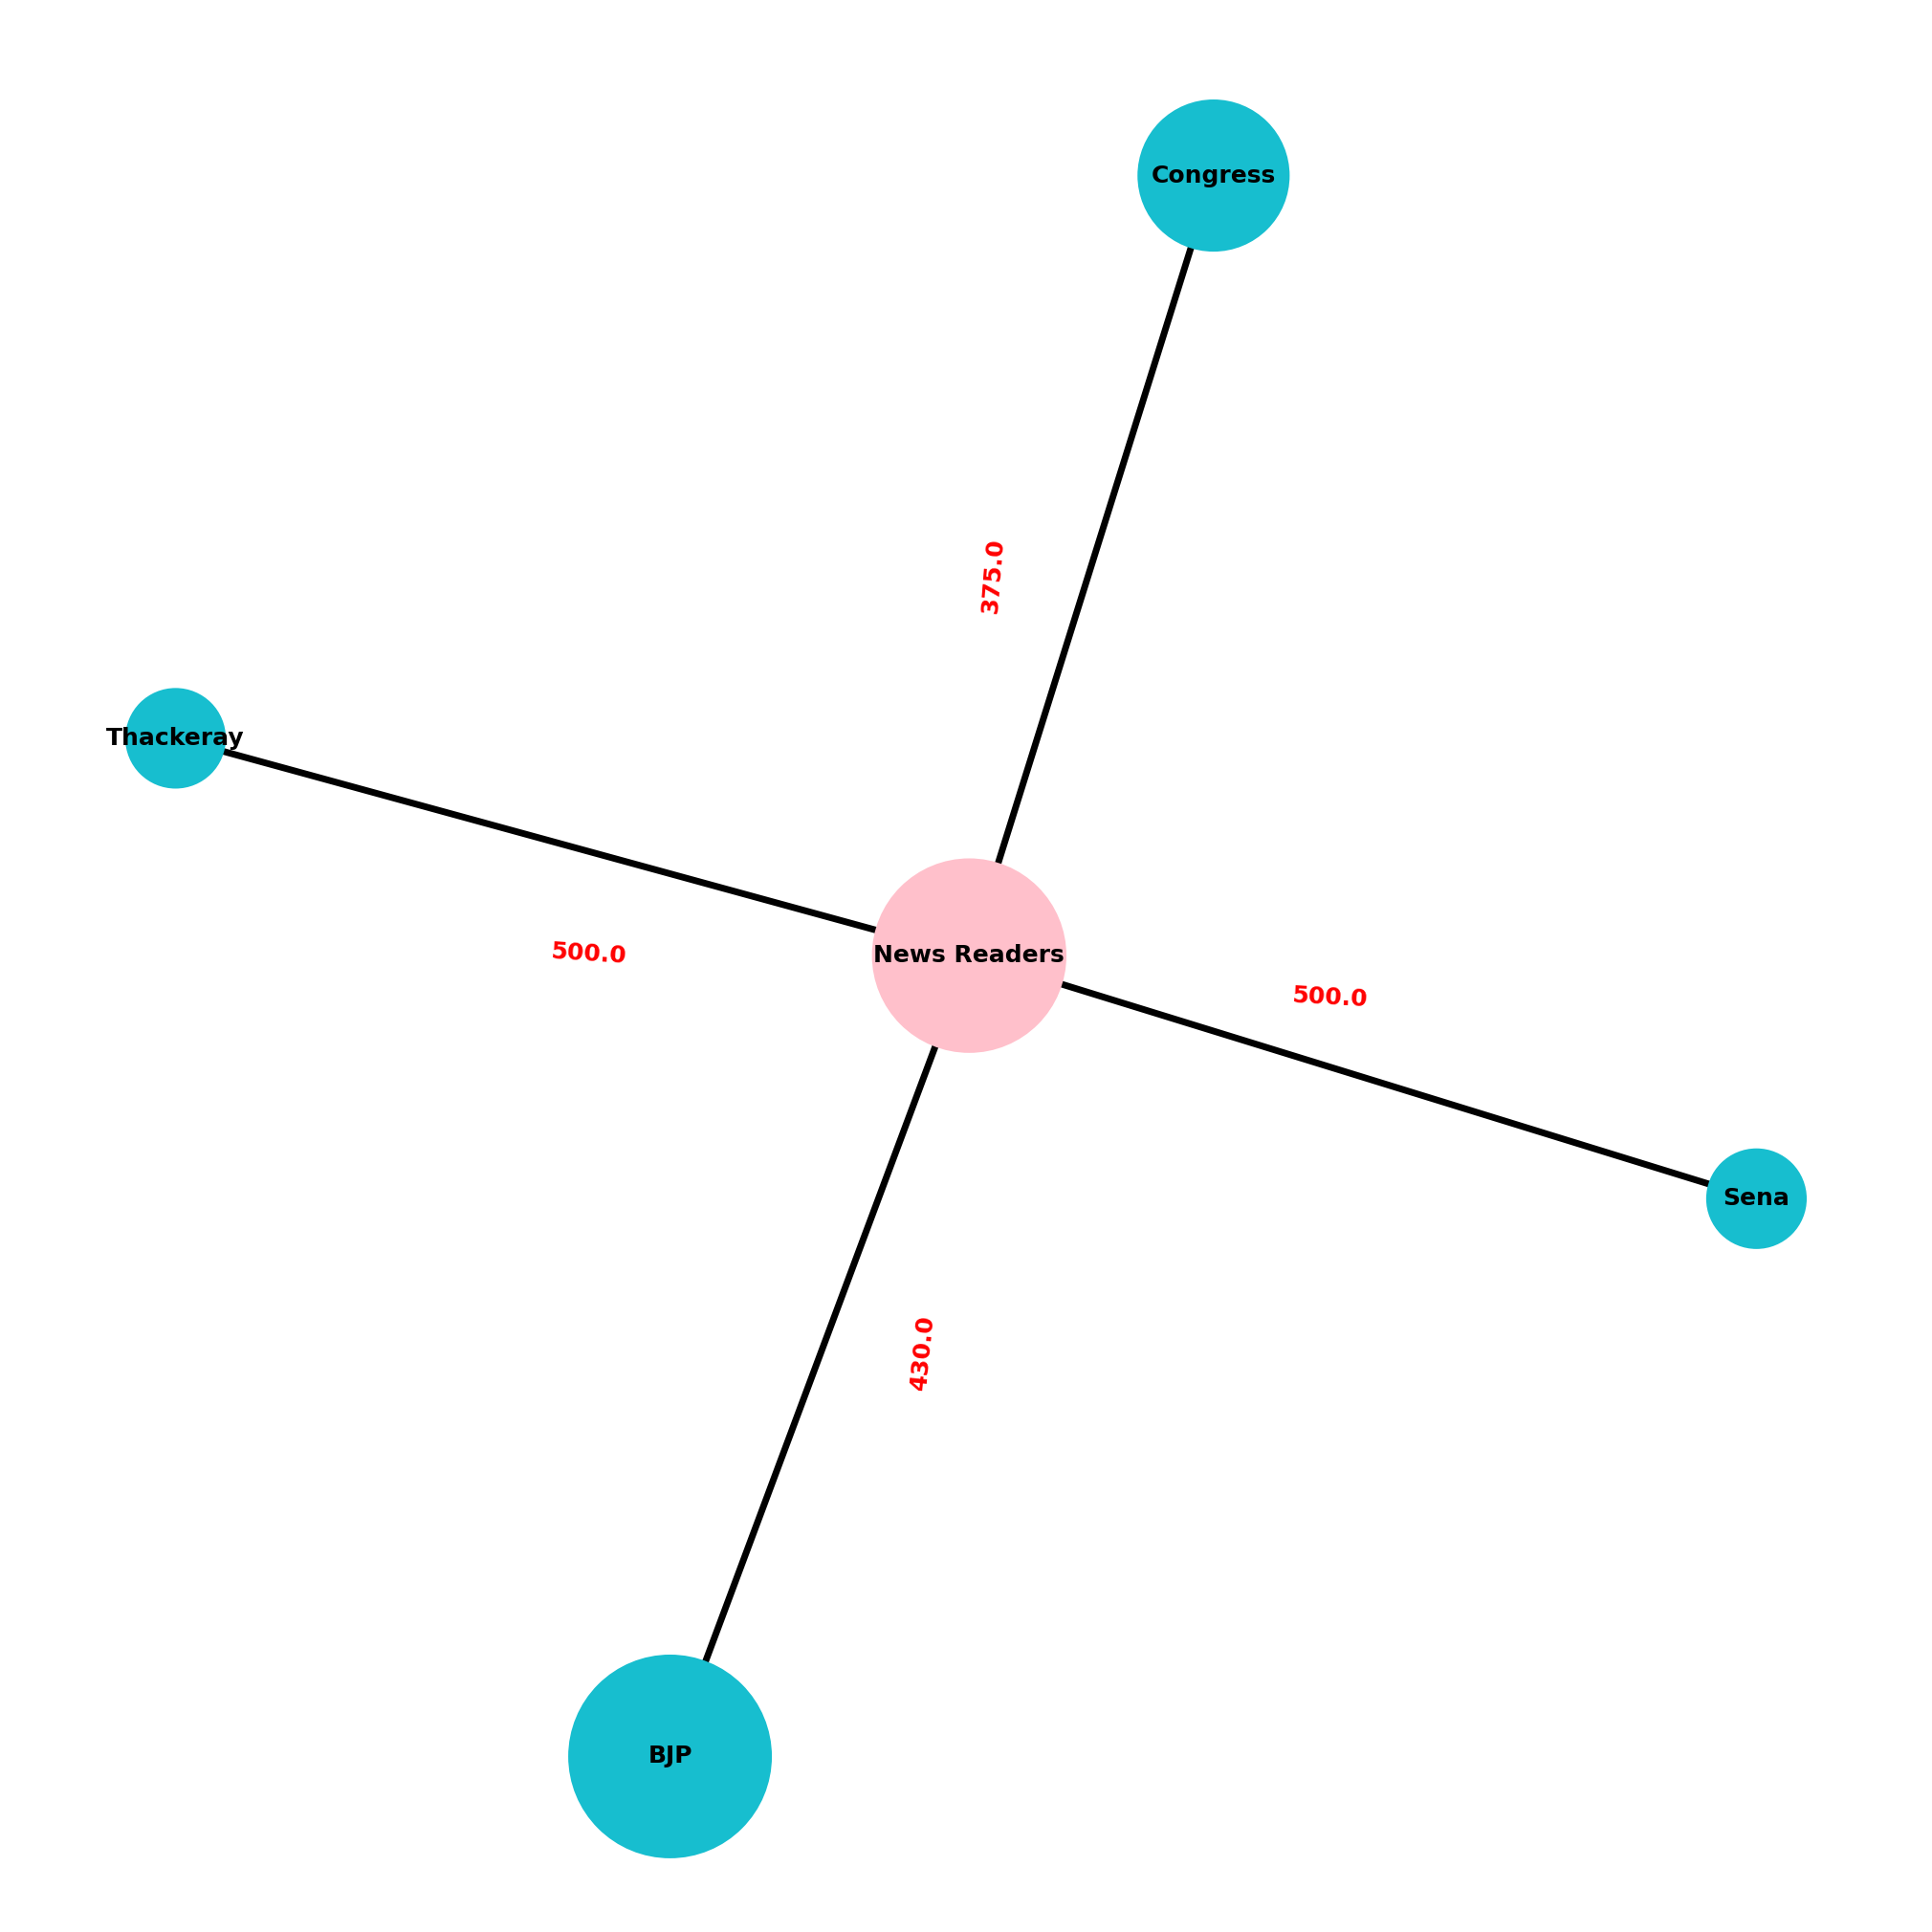

india_tv
[0.2, 0.18, 0.09, 0.14]
[0.2, 0.26, 0.19, 0.17]
{'News Readers': 3, 'Congress': 1, 'BJP': 1, 'Lok Sabha': 1}
{('News Readers', 'Congress'): '300.0', ('News Readers', 'BJP'): '335.0', ('News Readers', 'Lok Sabha'): '210.0'}


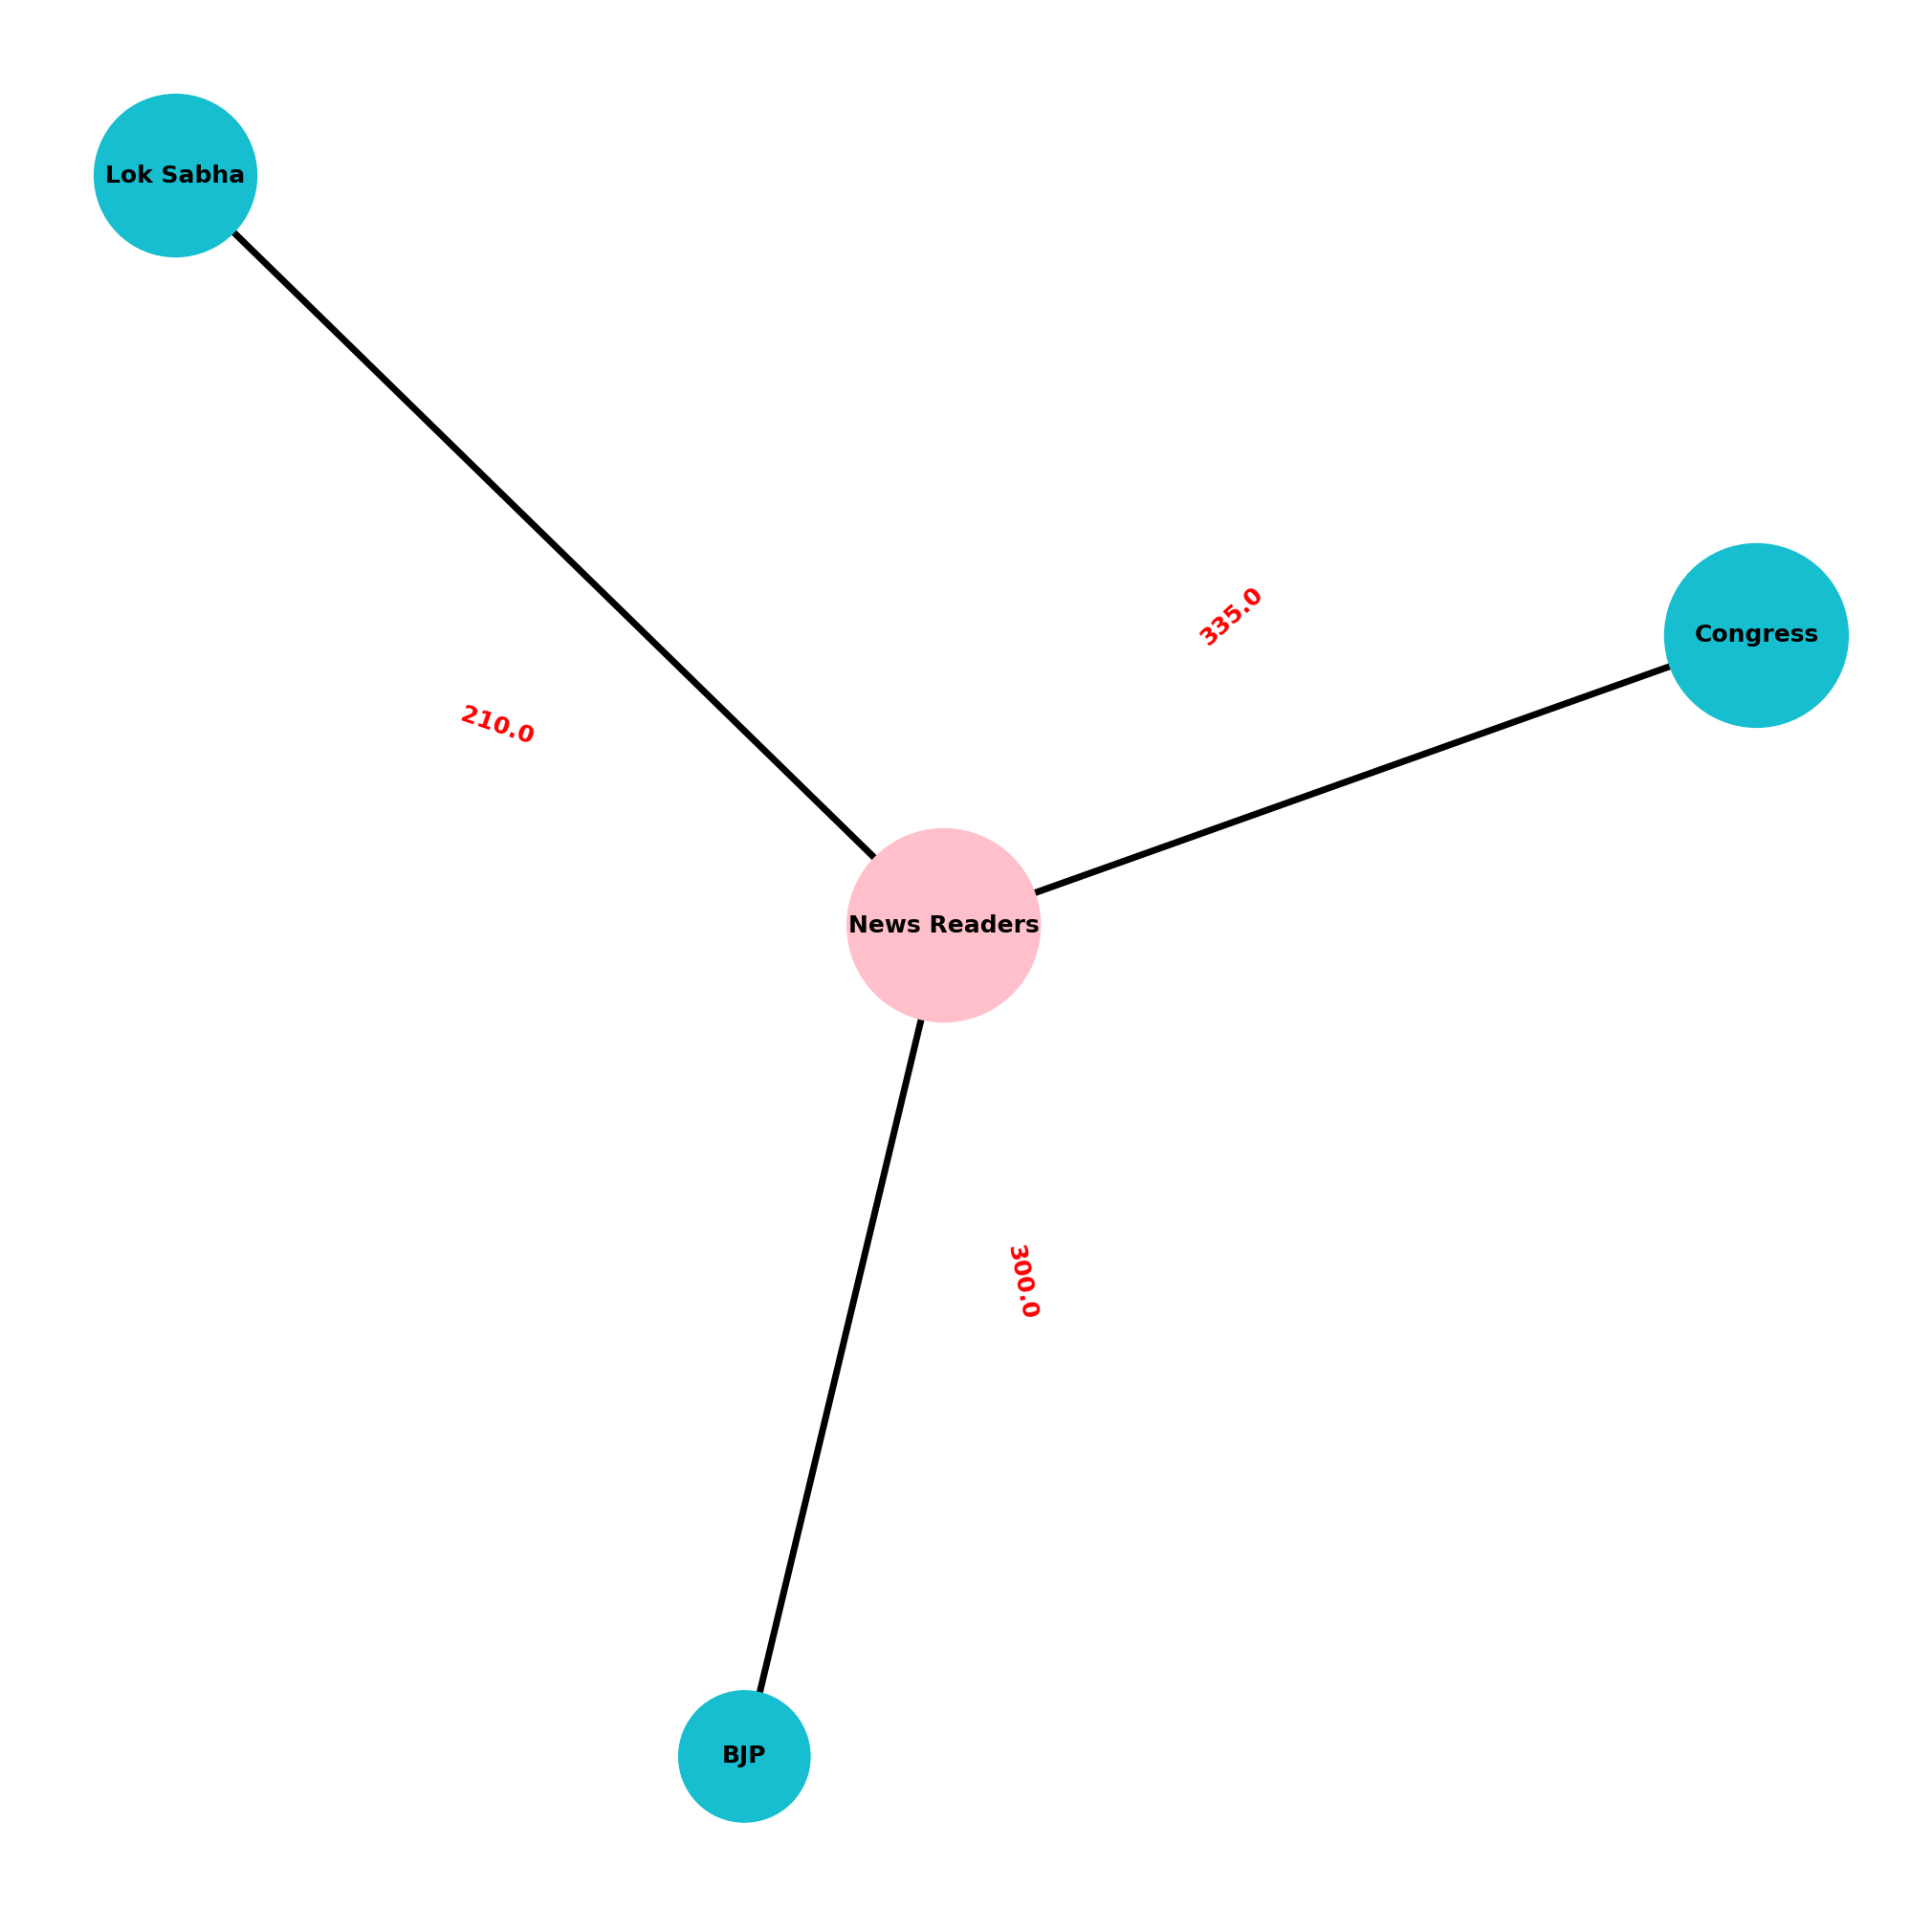

news_eight
[0.2, 0.13, 0.14, 0.13]
[0.2, 0.28, 0.25, 0.27]
{'News Readers': 3, 'Congress': 1, 'li': 1, 'BJP': 1}
{('News Readers', 'Congress'): '285.0', ('News Readers', 'li'): '265.0', ('News Readers', 'BJP'): '310.0'}


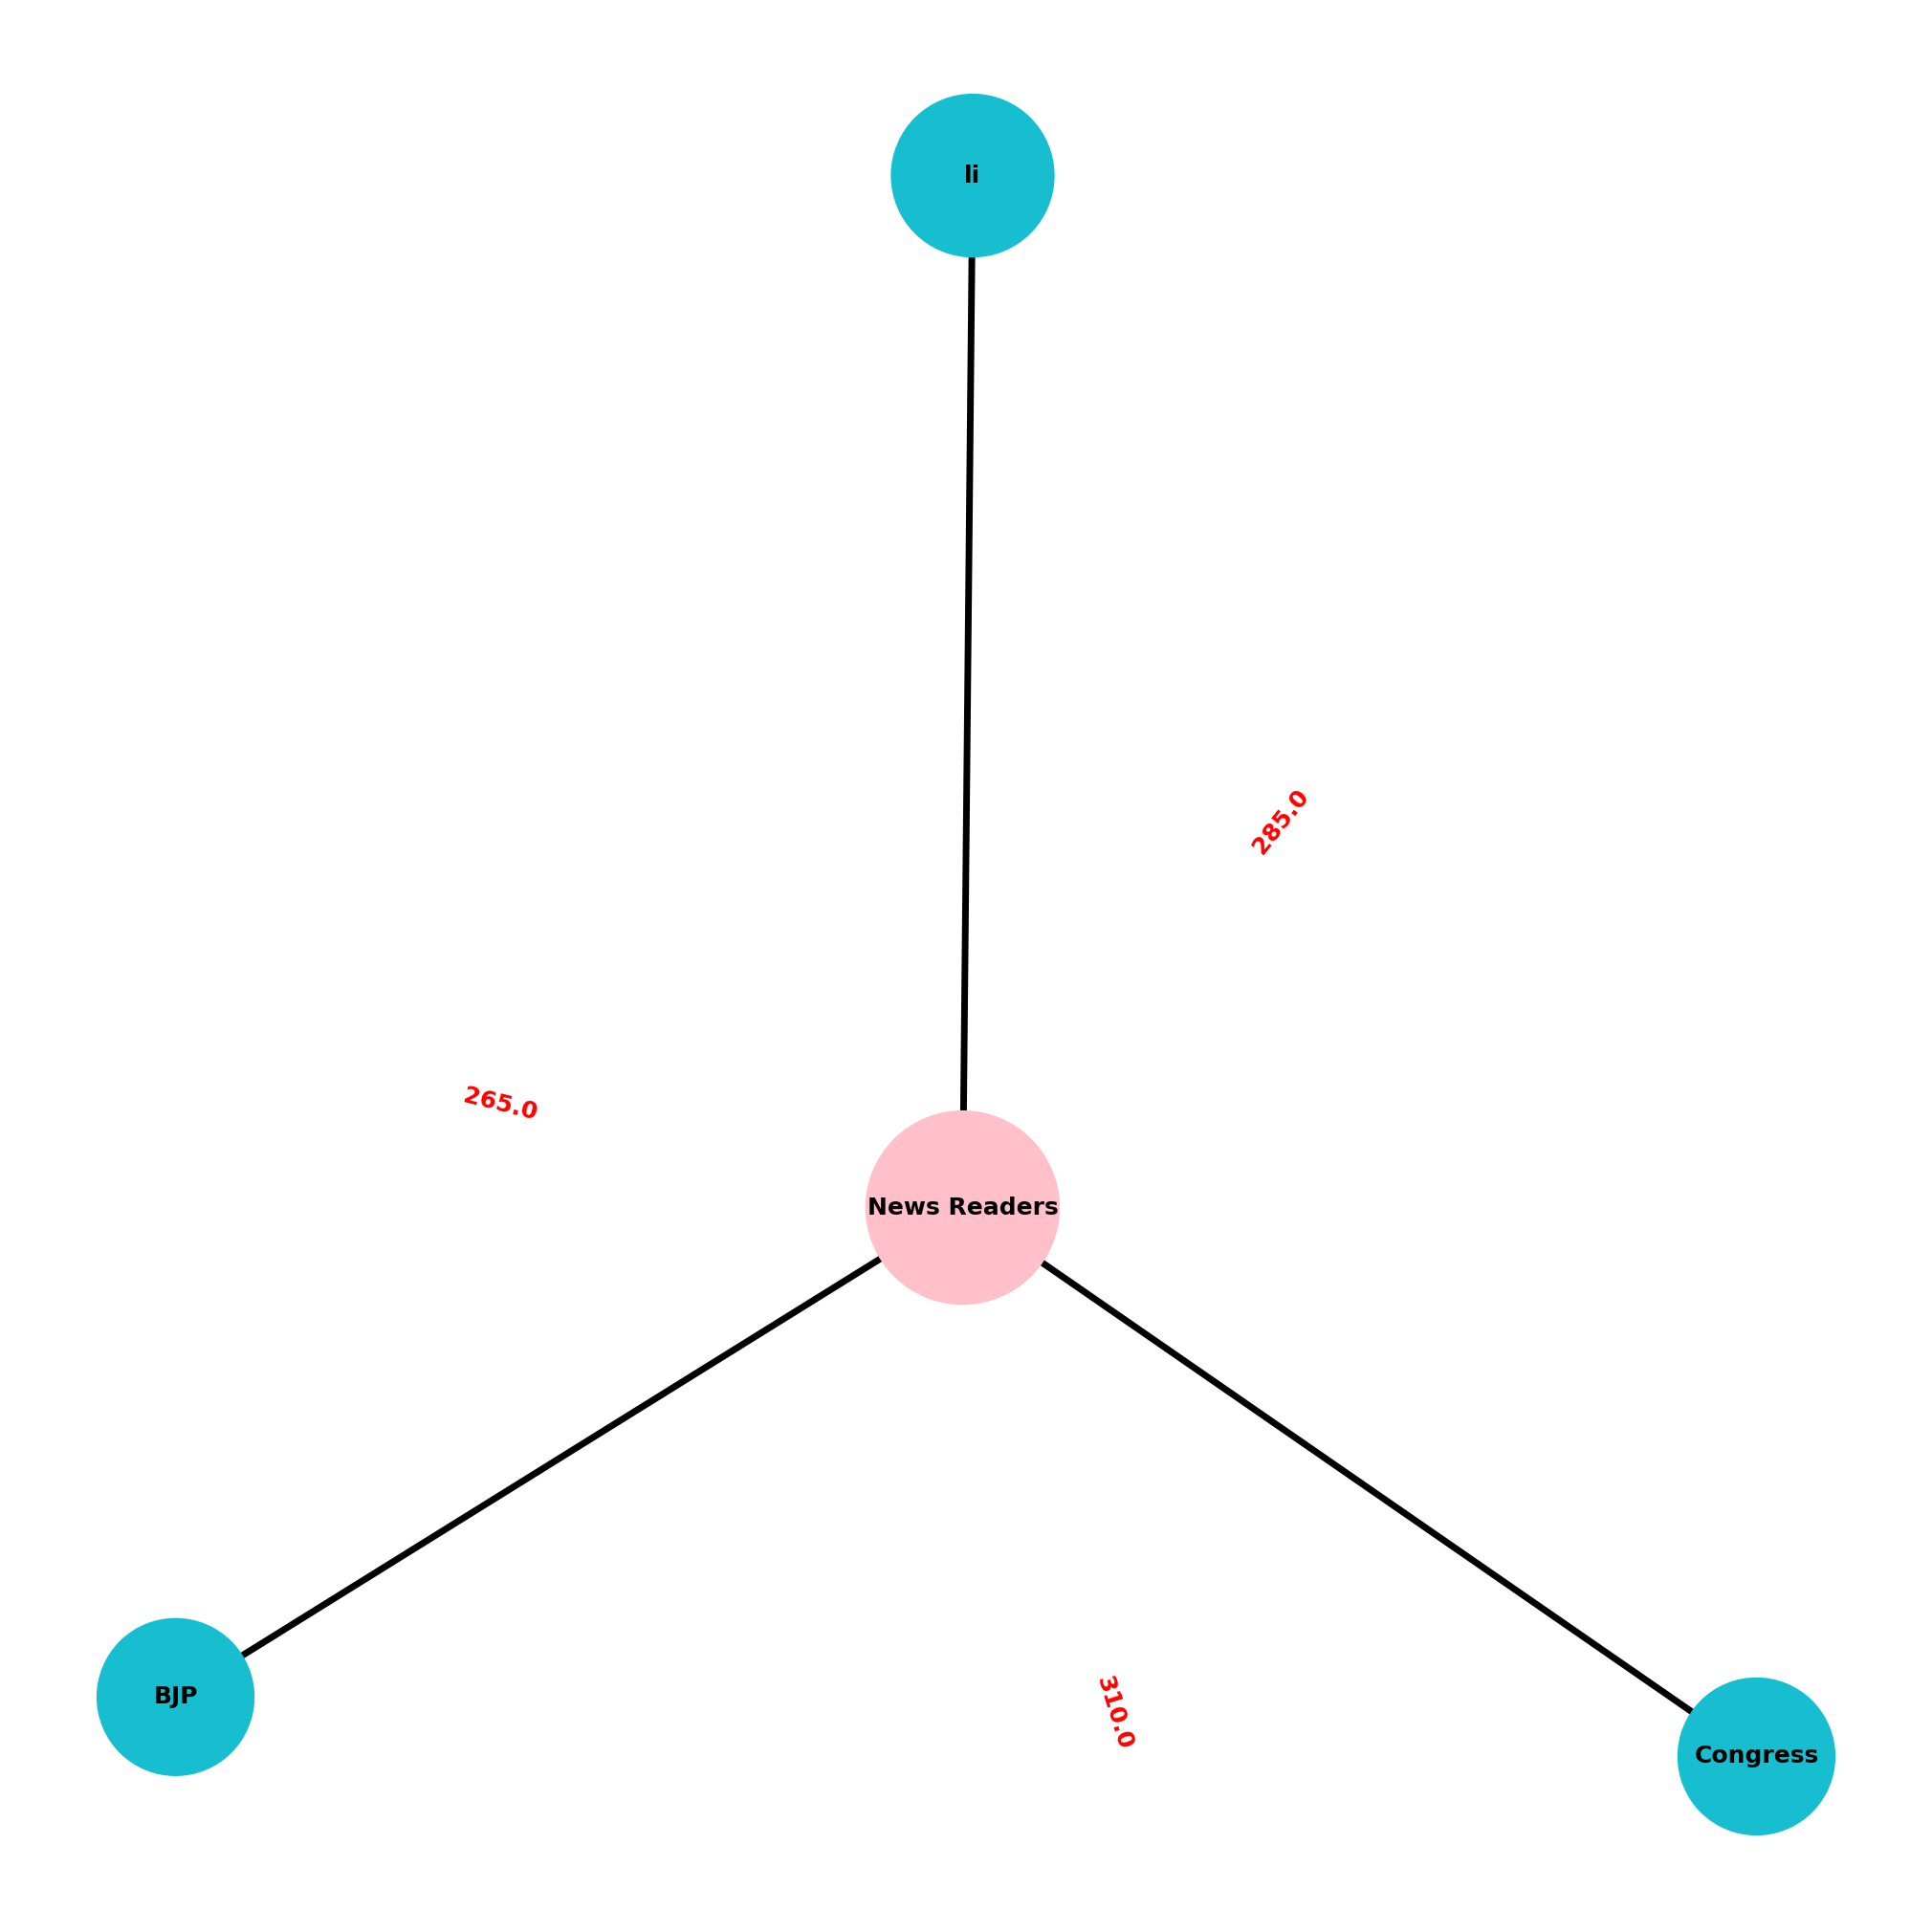

zee_news
[0.2, 0.08, 0.18, 0.08]
[0.2, 0.4, 0.11, 0.22]
{'News Readers': 3, 'Congress': 1, 'Lok Sabha': 1, 'BJP': 1}
{('News Readers', 'Congress'): '390.0', ('News Readers', 'Lok Sabha'): '440.0', ('News Readers', 'BJP'): '335.0'}


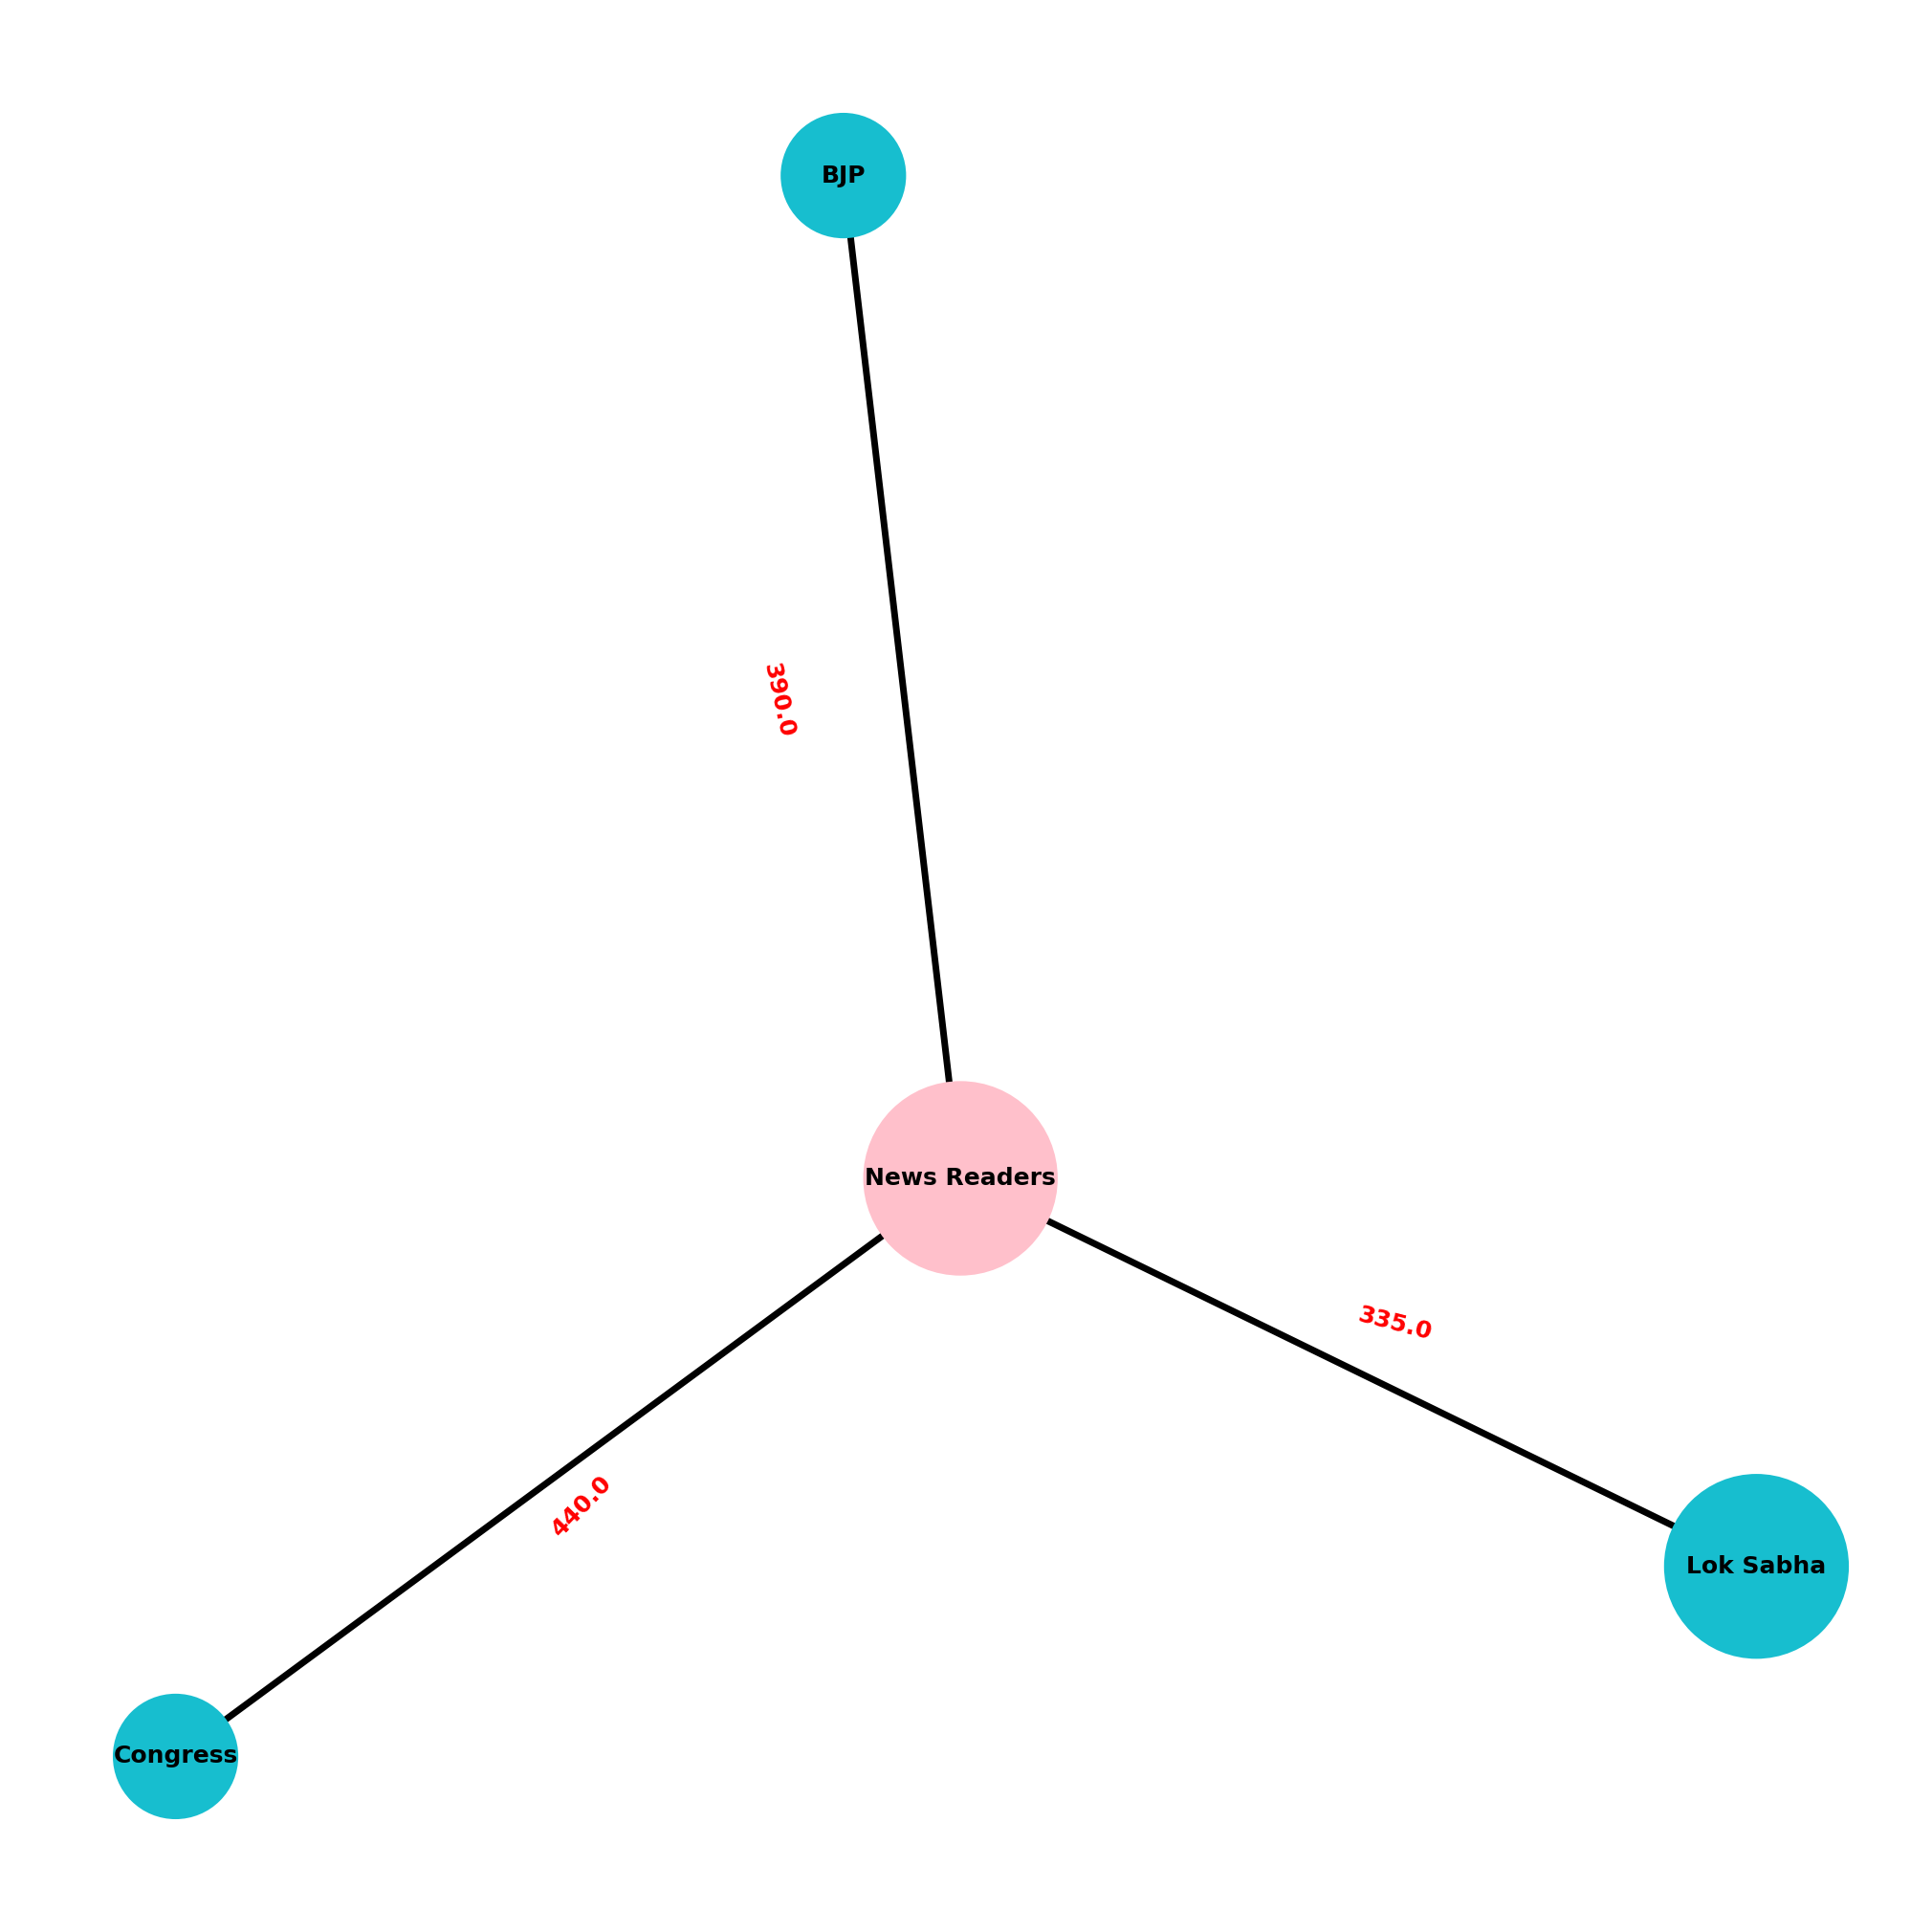

In [354]:
political_news_final
#print(political_news_final.groupby('News Portal')['Popularity'].sum())

print(top_entity_sentiments)
print("Average Positive Sentiment Score")
print(political_news.groupby('News Portal')['Positive Sentiment Score'].mean())
print("Average Negative Sentiment Score")
print(political_news.groupby('News Portal')['Negative Sentiment Score'].mean())
print("Average Neutral Sentiment Score")
print(political_news.groupby('News Portal')['Neutral Sentiment Score'].mean())
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib


plt.rcParams["figure.figsize"] = [20,20]
plt.rcParams["figure.autolayout"] = True

for portal, entities in top_entity_sentiments.items():
 
    print(portal)
  
    # for e in entities:
    #     # print(e)
    portal_graph = nx.Graph()  
    portal_graph.add_node("News Readers")
    pos = [0.2]
    neu = []
    neg = [0.2]
    pop = [4]
   
    for e in entities:
        name = list(e.keys())[0]
        portal_graph.add_node(name,  color = "red")
      
        pos.append(e[name]["avg_pos"])
        neu.append(e[name]["avg_neu"])
        neg.append(e[name]["avg_neg"])
        pop.append(e[name]["avg_pop"])

        portal_graph.add_weighted_edges_from([(name, "News Readers", str(500*e[name]["avg_pop"] ))])

    cmap = matplotlib.colors.ListedColormap(['C9', 'pink'])
    
    print(pos)
    print(neg)
    labels = dict(portal_graph.degree)
    print(labels)
    weight_labels= nx.get_edge_attributes( portal_graph,'weight')
    print(weight_labels)

    nx.draw(portal_graph, with_labels = True, nodelist = labels.keys(), edge_color='black', node_size=[v * 100000 for v in pos],font_weight="bold", node_color = [v * 10000 for v in pop], cmap = cmap, width=5, linewidths=5, font_size=18)
    nx.draw_networkx_edge_labels(portal_graph,pos = nx.spring_layout(portal_graph),edge_labels= weight_labels, font_weight="bold", font_color='red', font_size=18)
    plt.show()



In [35]:
len(node_dict)

820

In [36]:
len(edge_info)

34002

Calculate the average positive neutral and negative sentiments for all entities detected

In [37]:
for n in total_nodes:
  node_dict[n]["Average Positive Sentiment Score"] = node_dict[n]["Positive Sentiment Score"]/node_dict[n]["count"]
  node_dict[n]["Average Neutral Sentiment Score"] = node_dict[n]["Neutral Sentiment Score"]/node_dict[n]["count"]
  node_dict[n]["Average Negative Sentiment Score"] = node_dict[n]["Negative Sentiment Score"]/node_dict[n]["count"]

In [38]:
node_dict

{'Uri': {'Positive Sentiment Score': 0.6811374425888062,
  'Neutral Sentiment Score': 1.0798881649971008,
  'Negative Sentiment Score': 1.2389744892716408,
  'count': 3,
  'Average Positive Sentiment Score': 0.2270458141962687,
  'Average Neutral Sentiment Score': 0.35996272166570026,
  'Average Negative Sentiment Score': 0.4129914964238803},
 'Manikarnika': {'Positive Sentiment Score': 0.09019254893064499,
  'Neutral Sentiment Score': 0.4609849750995636,
  'Negative Sentiment Score': 0.4488225281238556,
  'count': 1,
  'Average Positive Sentiment Score': 0.09019254893064499,
  'Average Neutral Sentiment Score': 0.4609849750995636,
  'Average Negative Sentiment Score': 0.4488225281238556},
 'the Lok Sabha': {'Positive Sentiment Score': 1.8709454275667667,
  'Neutral Sentiment Score': 5.416237011551857,
  'Negative Sentiment Score': 2.712817396968603,
  'count': 10,
  'Average Positive Sentiment Score': 0.18709454275667667,
  'Average Neutral Sentiment Score': 0.5416237011551857,
  'Ave

In [39]:
political_news

News Title            Author   
9    PM Narendra Modis Biopic To Release On April 1...     Garima Satija  \
10   This Farmer, With Only An Acre Of Land, Is Set...  Sylvester Tamang   
11   Man Prints 'No Gifts, Please Vote For PM Modi'...  Priyanshi Mathur   
12   How The Lok Sabha Elections 2019 Are Also The ...     Shweta Sengar   
13   PM Modi Tweets To 'Influencers', Urges Them To...    Maninder Dabas   
..                                                 ...               ...   
963  Suspended AAP lawmaker Haridner Singh Khalsa j...               PTI   
964  BJP Minister Anil Sharma not to campaign again...               PTI   
965  240 bills passed in outgoing Lok Sabha, Mahara...  Zee Media Bureau   
966  Tamil Nadu: IT department raids DMK leader Dur...  Zee Media Bureau   
967  Congress-RJD tensions subside; Bihar Mahagathb...  Zee Media Bureau   

                                         News Abstract        Day Genre   
9    Election season is around the corner and almos...     friday  poli  \
10   India's general elections are around the corne...    tuesday  poli   
11   Recently, there have been a lot of cases where...     monday  poli   
12   Elections and polyvinyl chloride (PVC) plastic...     sunday  poli   
13   With just over a month to for the elections in...  wednesday  poli   
..                                                 ...        ...   ...   
963  New Delhi: Sitting parliamentarian from Punjab...   thursday  poli   
964  Shimla: Power minister in the BJP government i...   saturday  poli   
965  A total of 240 bills, out of the 273 bills int...   thursday  poli   
966  Income tax department conducted multiple raids...   saturday  poli   
967  Congress leaders dismissed all rumours of crac...   thursday  poli   

     News Portal  Positive Sentiment Score  Neutral Sentiment Score   
9    india_times                  0.090193                 0.460985  \
10   india_times                  0.308743                 0.353162   
11   india_times                  0.020350                 0.089882   
12   india_times                  0.062922                 0.337610   
13   india_times                  0.517126                 0.267921   
..           ...                       ...                      ...   
963     zee_news                  0.039300                 0.882869   
964     zee_news                  0.071606                 0.540590   
965     zee_news                  0.033208                 0.913380   
966     zee_news                  0.027328                 0.568226   
967     zee_news                  0.026930                 0.427183   

     Negative Sentiment Score           Relations   
9                    0.448823             claimed  \
10                   0.338095                  is   
11                   0.889769             held in   
12                   0.599468              slated   
13                   0.214953                took   
..                        ...                 ...   
963                  0.077831              joined   
964                  0.387804                said   
965                  0.053412            revealed   
966                  0.404446  conducted multiple   
967                  0.545887           dismissed   

                                              Entities  
9                                   [Uri, Manikarnika]  
10   [the Lok Sabha, Pramila Bisoi, Biju Janata Dal...  
11   [Narendra Modi, the Election Commission, EC, J...  
12                                                  []  
13   [Naredra Modi, Indian, PM Modi, Lok Sabha, Con...  
..                                                 ...  
963  [Punjab Harinder Singh Khalsa, the Aam Aadmi P...  
964  [BJP, Himachal Pradesh, Anil Sharma, Aashray S...  
965  [Lok Sabha, Association for Democratic Reforms...  
966                 [DMK, Durai Murugan, Tamil Nadu's]  
967                         [Congress, Grand Alliance]  

[200 rows x 11 columns]

Save analysis in CSV file

In [40]:
political_news.to_csv("Political News Dataset Analysis.csv")

In [42]:
! pip install networkx

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


Draw Graph

In [43]:
import networkx as nx
G = nx.Graph()

In [44]:
graph_nodes = []

In [45]:
len(total_nodes)

2178

A node in the graph will be a tuple of (entity, Avg Positive Sentiment Score, Average Neutral Sentiment Score, Avg Negative Sentiment Score)

In [46]:
for n in set(total_nodes):
  graph_nodes.append((n, node_dict[n]['Average Positive Sentiment Score'],node_dict[n]['Average Neutral Sentiment Score'],node_dict[n]['Average Negative Sentiment Score']))

In [47]:
for e in edge_info:
  n1 = (e[0],node_dict[e[0]]['Average Positive Sentiment Score'],node_dict[e[0]]['Average Neutral Sentiment Score'],node_dict[e[0]]['Average Negative Sentiment Score'])
  n2 = (e[1],node_dict[e[1]]['Average Positive Sentiment Score'],node_dict[e[1]]['Average Neutral Sentiment Score'],node_dict[e[1]]['Average Negative Sentiment Score'])
  edges.append((n1,n2))

In [48]:
graph_nodes

[('Prayagraj', 0.3185521562894185, 0.26217833161354065, 0.41926949967940647),
 ("the Election Commission's",
  0.05539320781826973,
  0.6976538300514221,
  0.24695295095443726),
 ('Ashok Chavan',
  0.037620894610881805,
  0.9306199550628662,
  0.03175914287567139),
 ('Cabinet', 0.5414801239967346, 0.3673686385154724, 0.09115124493837357),
 ('the Karnataka Assembly',
  0.04223378747701645,
  0.6246674209833145,
  0.3330987524241209),
 ('Facebook.', 0.01877199113368988, 0.9598835706710815, 0.021344389766454697),
 ('Hindu', 0.04555404062072436, 0.2204989790916443, 0.733946959177653),
 ('Lal Bahadur Shastri',
  0.16779085993766785,
  0.8149362802505493,
  0.017272835597395897),
 ('Yogesh Dahiya',
  0.043940916657447815,
  0.9371302723884583,
  0.018928809091448784),
 ('the Environmental Protection Act',
  0.11937183141708374,
  0.7539194822311401,
  0.12670868635177612),
 ('Rajya Sabha', 0.14262846112251282, 0.698347787062327, 0.15902377168337503),
 ('EM Sudarsana', 0.10966966301202774, 0.

In [49]:
edges

[(('Uri', 0.2270458141962687, 0.35996272166570026, 0.4129914964238803),
  ('Manikarnika',
   0.09019254893064499,
   0.4609849750995636,
   0.4488225281238556)),
 (('the Lok Sabha',
   0.18709454275667667,
   0.5416237011551857,
   0.2712817396968603),
  ('Pramila Bisoi',
   0.30874255299568176,
   0.3531621992588043,
   0.33809518814086914)),
 (('the Lok Sabha',
   0.18709454275667667,
   0.5416237011551857,
   0.2712817396968603),
  ('Biju Janata Dal',
   0.5198407024145126,
   0.23744724690914154,
   0.24271203577518463)),
 (('the Lok Sabha',
   0.18709454275667667,
   0.5416237011551857,
   0.2712817396968603),
  ('Aska Lok Sabha',
   0.30874255299568176,
   0.3531621992588043,
   0.33809518814086914)),
 (('Pramila Bisoi',
   0.30874255299568176,
   0.3531621992588043,
   0.33809518814086914),
  ('Biju Janata Dal',
   0.5198407024145126,
   0.23744724690914154,
   0.24271203577518463)),
 (('Pramila Bisoi',
   0.30874255299568176,
   0.3531621992588043,
   0.33809518814086914),
  ('

In [50]:
for n in graph_nodes:
  G.add_node(n)

In [51]:
print(len(set(edges)))

14314


In [52]:
G.add_edges_from(edges)

In [54]:
! pip install matplotlib

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
  Using cached matplotlib-3.7.1-cp310-cp310-macosx_11_0_arm64.whl (7.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.5 MB/s eta 0:00:00a 0:00:01
  Using cached contourpy-1.0.7-cp310-cp310-macosx_11_0_arm64.whl (229 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached kiwisolver-1.4.4-cp310-cp310-macosx_11_0_arm64.whl (63 kB)

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [110]:
import matplotlib.pyplot as plt

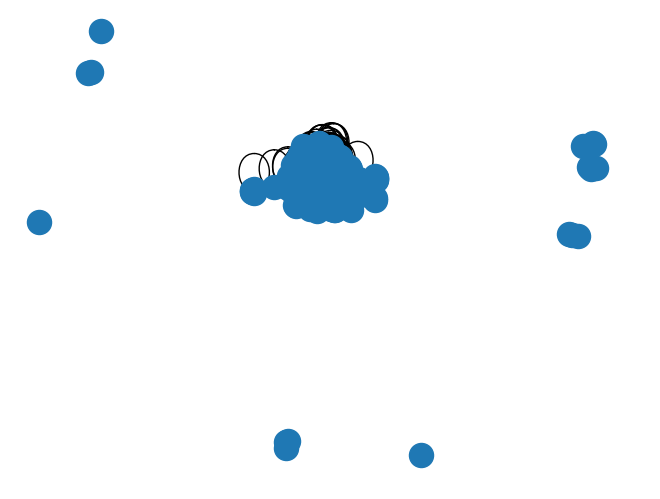

In [56]:
nx.draw(G)

In [57]:
G.nodes

NodeView((('Prayagraj', 0.3185521562894185, 0.26217833161354065, 0.41926949967940647), ("the Election Commission's", 0.05539320781826973, 0.6976538300514221, 0.24695295095443726), ('Ashok Chavan', 0.037620894610881805, 0.9306199550628662, 0.03175914287567139), ('Cabinet', 0.5414801239967346, 0.3673686385154724, 0.09115124493837357), ('the Karnataka Assembly', 0.04223378747701645, 0.6246674209833145, 0.3330987524241209), ('Facebook.', 0.01877199113368988, 0.9598835706710815, 0.021344389766454697), ('Hindu', 0.04555404062072436, 0.2204989790916443, 0.733946959177653), ('Lal Bahadur Shastri', 0.16779085993766785, 0.8149362802505493, 0.017272835597395897), ('Yogesh Dahiya', 0.043940916657447815, 0.9371302723884583, 0.018928809091448784), ('the Environmental Protection Act', 0.11937183141708374, 0.7539194822311401, 0.12670868635177612), ('Rajya Sabha', 0.14262846112251282, 0.698347787062327, 0.15902377168337503), ('EM Sudarsana', 0.10966966301202774, 0.2540423274040222, 0.6362879872322083),

In [58]:
G.edges

EdgeView([(('Prayagraj', 0.3185521562894185, 0.26217833161354065, 0.41926949967940647), ('Priyanka Gandhi Vadra', 0.14617208298295736, 0.40084667354822157, 0.45298125725239513)), (('Prayagraj', 0.3185521562894185, 0.26217833161354065, 0.41926949967940647), ('Narendra Modi', 0.09560581411306675, 0.4028988679250081, 0.5014953272273908)), (('Prayagraj', 0.3185521562894185, 0.26217833161354065, 0.41926949967940647), ('Nitin Gadkari', 0.18115091572205225, 0.5684440202183194, 0.2504050799955924)), (('Prayagraj', 0.3185521562894185, 0.26217833161354065, 0.41926949967940647), ('Congress', 0.12179246727358456, 0.47179095330999127, 0.4064165773150984)), (('Prayagraj', 0.3185521562894185, 0.26217833161354065, 0.41926949967940647), ("Priyanka Gandhi Vadra's", 0.19644621014595032, 0.22629843652248383, 0.5772553086280823)), (('Prayagraj', 0.3185521562894185, 0.26217833161354065, 0.41926949967940647), ('Ms Vadra', 0.19644621014595032, 0.22629843652248383, 0.5772553086280823)), (('Prayagraj', 0.318552

In [ ]:
import pickle

# save graph object to file
pickle.dump(G, open('INDGraph.pickle', 'wb'))